# Heat-exchanger data analysis and engineering calcs (Cristian Merli, UniTn id: 211384)

## Environment setup

### - General software info

* Useful links:

https://code.visualstudio.com/docs/datascience/data-science-tutorial

* SW header:

In [23]:
__author__ = "Cristian Merli"
__copyright__ = "Copyright 2021, The Cogent Project"
__credits__ = ["Cristian Merli", "Ing. Maurizio Grigiante"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Cristian Merli"
__email__ = "cristian.merli@studenti.unitn.it"
__status__ = "Draft"

### - Libraries import

* Import libraries and packages

In [24]:
import pandas as pd                                                                                     # Data-analysis panda lib
import numpy as np                                                                                      # Data-analysis numpy lib

* Import project personal libraries

In [25]:
import plotting_lib as pl                                                                               # Plotting lib
import data_analysis_lib as da                                                                          # Data analysis lib
import poly_approx_lib as pa                                                                            # Poly-approximation lib
import eng_calcs_lib as ec                                                                              # Engineering calcs lib

## Heat-exchanger data analysis

### - Data extraction and filtering

* Import dataset data from formatted (.csv) file, creating a 'DataFrame' variable

In [26]:
he_data = da.load_dataset_data()                                                                        # Function call to format dataset and import data from (.csv) file, creating a new panda DataFrame variable

* Data intervals detection: extract data in different operating conditions

In [27]:
delim_idxs = [0] * 8                                                                                    # Delimiter-indexes array (array containing 8 dataframe row idxs - configurations start/end idxs)
arr_cell_ptr = 0                                                                                        # Delimiter-indexes array cells pointer (to access array cells vals)
rows_scroll_index = 0                                                                                   # Index to trace current row in dataframe rows scrolling cycle
old_oper_str = ""                                                                                       # Operation string in previous dataframe row
oper_str = ""                                                                                           # Operation string in current dataframe row

for rows_scroll_index, row in he_data.iterrows():                                                       # Cycle to scroll rows in dataframe, tracing row index
    old_oper_str = oper_str                                                                             # Update previous dataframe row string
    oper_str = row[da.conf_col]                                                                         # Update current dataframe row string
    if (rows_scroll_index > 1):                                                                         # Skip first row (previous and current dataframe row strings are initialized with the same val)
        if ((old_oper_str == da.oth_op_lbl) & (oper_str == da.cocurrent_flow_lbl)):                     # Cocurrent flow configuration start detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
        if ((old_oper_str == da.cocurrent_flow_lbl) & (oper_str == da.oth_op_lbl)):                     # Cocurrent flow configuration end detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index (+1 for data split) in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
        if ((old_oper_str == da.oth_op_lbl) & (oper_str == da.countercurrent_flow_lbl)):                # Countercurrent flow configuration start detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
        if ((old_oper_str == da.countercurrent_flow_lbl) & (oper_str == da.oth_op_lbl)):                # Countercurrent flow configuration end detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index (+1 for data split) in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
if (delim_idxs[7] == 0):                                                                                # In case last configuration lasts 'till dataframe tail row
    delim_idxs[7] = rows_scroll_index+1                                                                 # Set last configuration end idx as tail row idx inside delimiter-idxs array (+1 for data split)

he_data_measures = list()                                                                               # New heat-exchanger data measures list declaration and following definition
he_data_measures.append(he_data[delim_idxs[0]:delim_idxs[1]])                                           # Extract and add cocurrent measure 1 (btwn 1st and 2nd index in delimiter-indexes array)
he_data_measures.append(he_data[delim_idxs[2]:delim_idxs[3]])                                           # Extract and add countercurrent measure 1 (btwn 3rd and 4th index in delimiter-indexes array)
he_data_measures.append(he_data[delim_idxs[4]:delim_idxs[5]])                                           # Extract and add countercurrent measure 2 (btwn 5th and 6th index in delimiter-indexes array)
he_data_measures.append(he_data[delim_idxs[6]:delim_idxs[7]])                                           # Extract and add cocurrent measure 2 (btwn 6th and 7th index in delimiter-indexes array)

for he_data_measure in he_data_measures:                                                                # Heat-exchanger data measures scrollin' cycle
  he_data_measure = he_data_measure[~he_data_measure[da.conf_col].isin([da.oth_op_lbl])]                # Remove eventual data corresponding to other-operation in each heat-exchanger data measure in list

* Plot data in DataFrame 'he_data' variable: temperatures and volume flow rates, taken during LabView data-acquisition on heat-exchanger

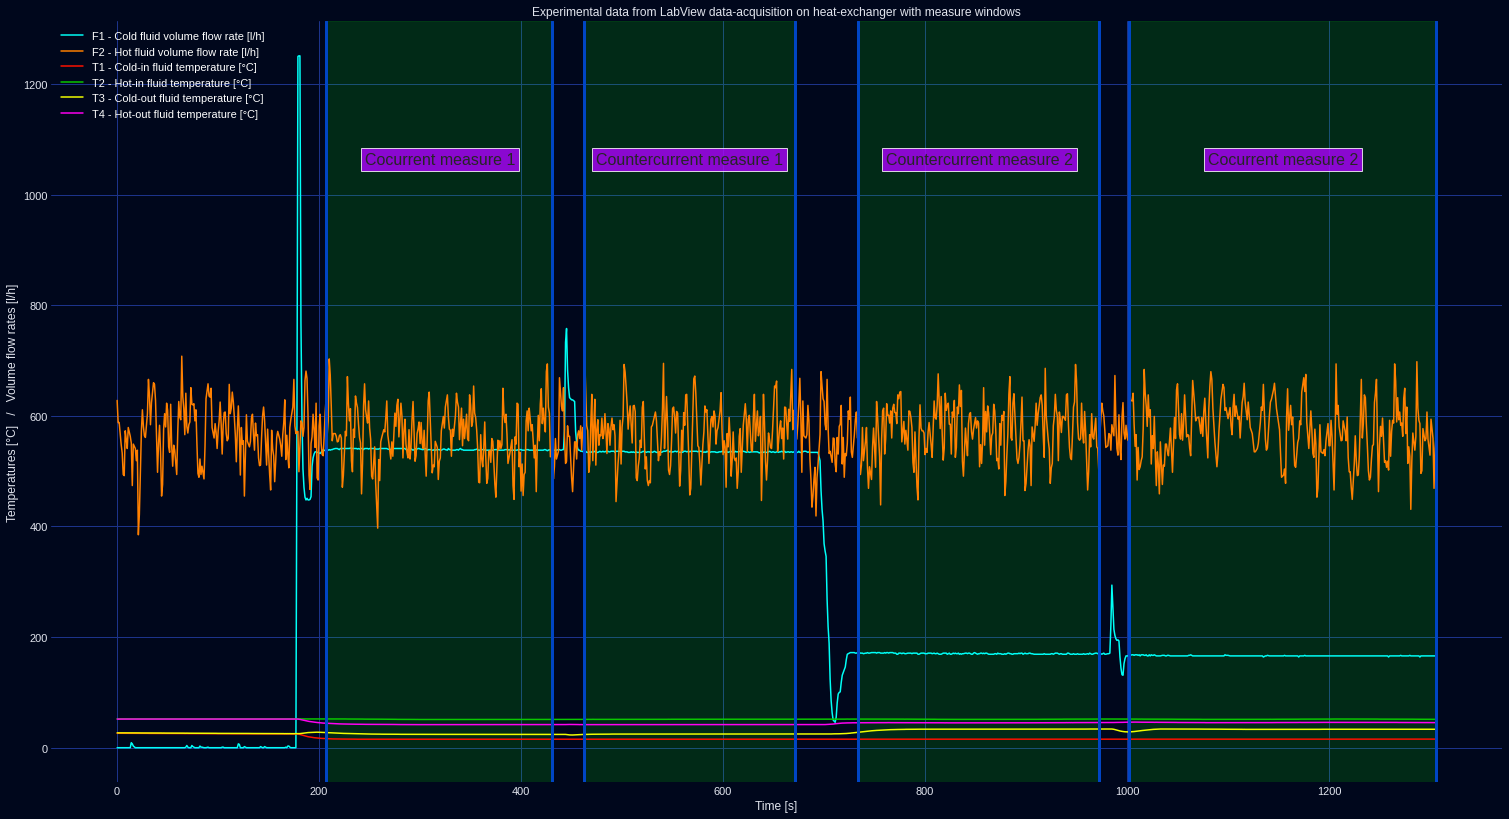

<Figure size 1872x1008 with 0 Axes>

In [28]:
plt_title = "Experimental data from LabView data-acquisition on heat-exchanger with measure windows"    # Plot title
pl.plot_data_flt(he_data, plt_title, None, delim_idxs, None, pl.Plt_mode.complete)                      # Function call to graphically plot data filtering operations (complete plottin' mode)

* Find data windows with optimal steady conditions, calling the previously defined functions


-----------------------------------------------------------------------
--> NEW 'find_stdy_cond()' FUNCTION CALL FOR Cocurrent measure 1
-----------------------------------------------------------------------

f1_stddev:  1.1240754280918839 
f2_stddev:  47.495766287438315 
t1_stddev:  0.03535092488376105
t2_stddev:  0.30036922763303214 
t3_stddev:  0.2840200094936256 
t4_stddev:  0.2679361403038012
mean_stddev:  8.25125300297407 

f1_stddev:  0.6103559060784889 
f2_stddev:  52.591290345690496 
t1_stddev:  0.04845941195208172
t2_stddev:  0.08074528004588409 
t3_stddev:  0.06258916236811773 
t4_stddev:  0.05811220796104254
mean_stddev:  8.908592052349352 

min_stddevs_datablocks_idx:  0

-----------------------------------------------------------------------
--> NEW 'find_stdy_cond()' FUNCTION CALL FOR Countercurrent measure 1
-----------------------------------------------------------------------

f1_stddev:  0.8637519410862924 
f2_stddev:  55.477547729891114 
t1_stddev:  0.04229142105

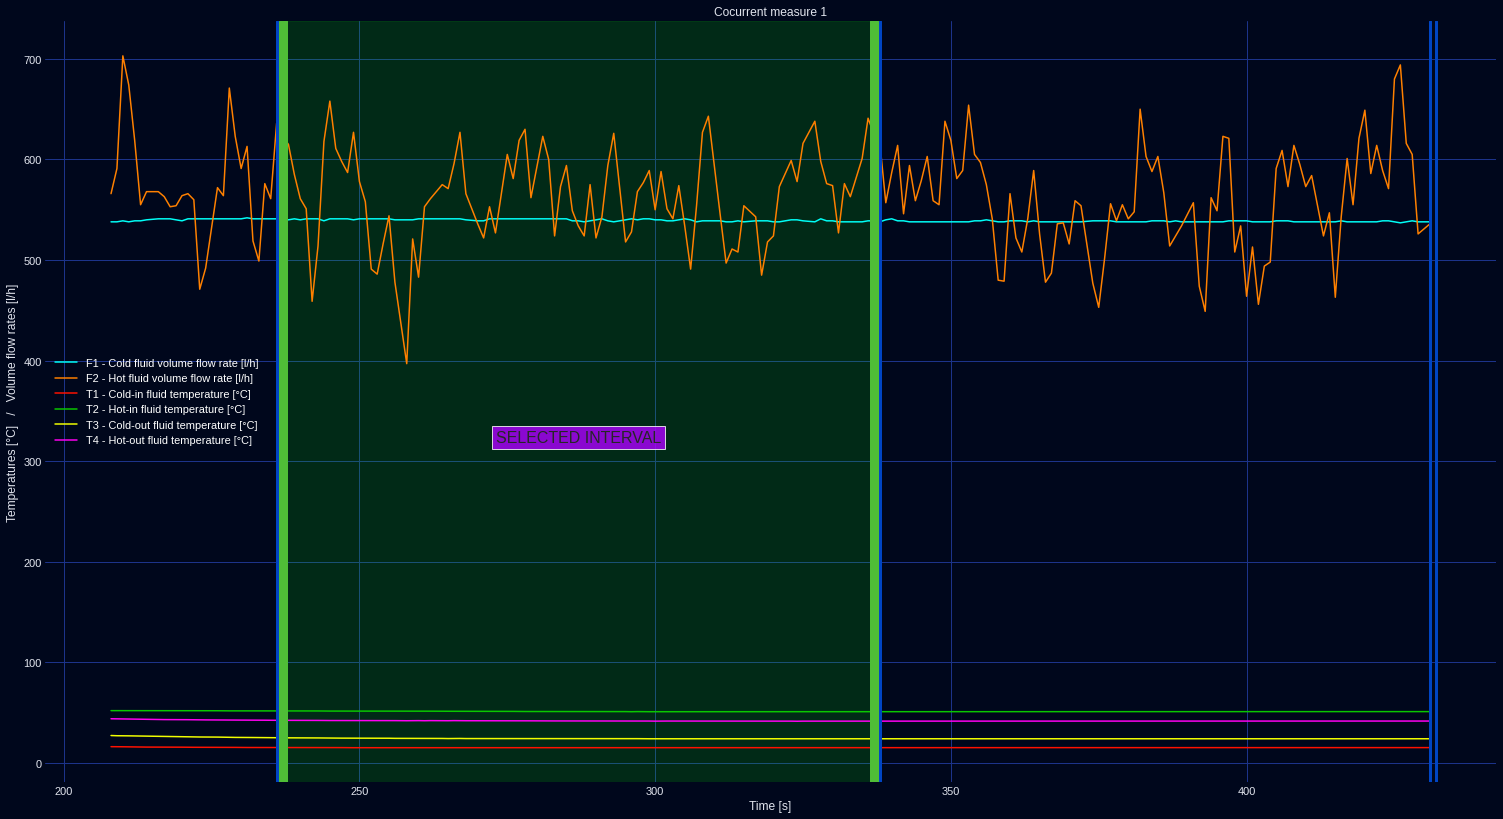

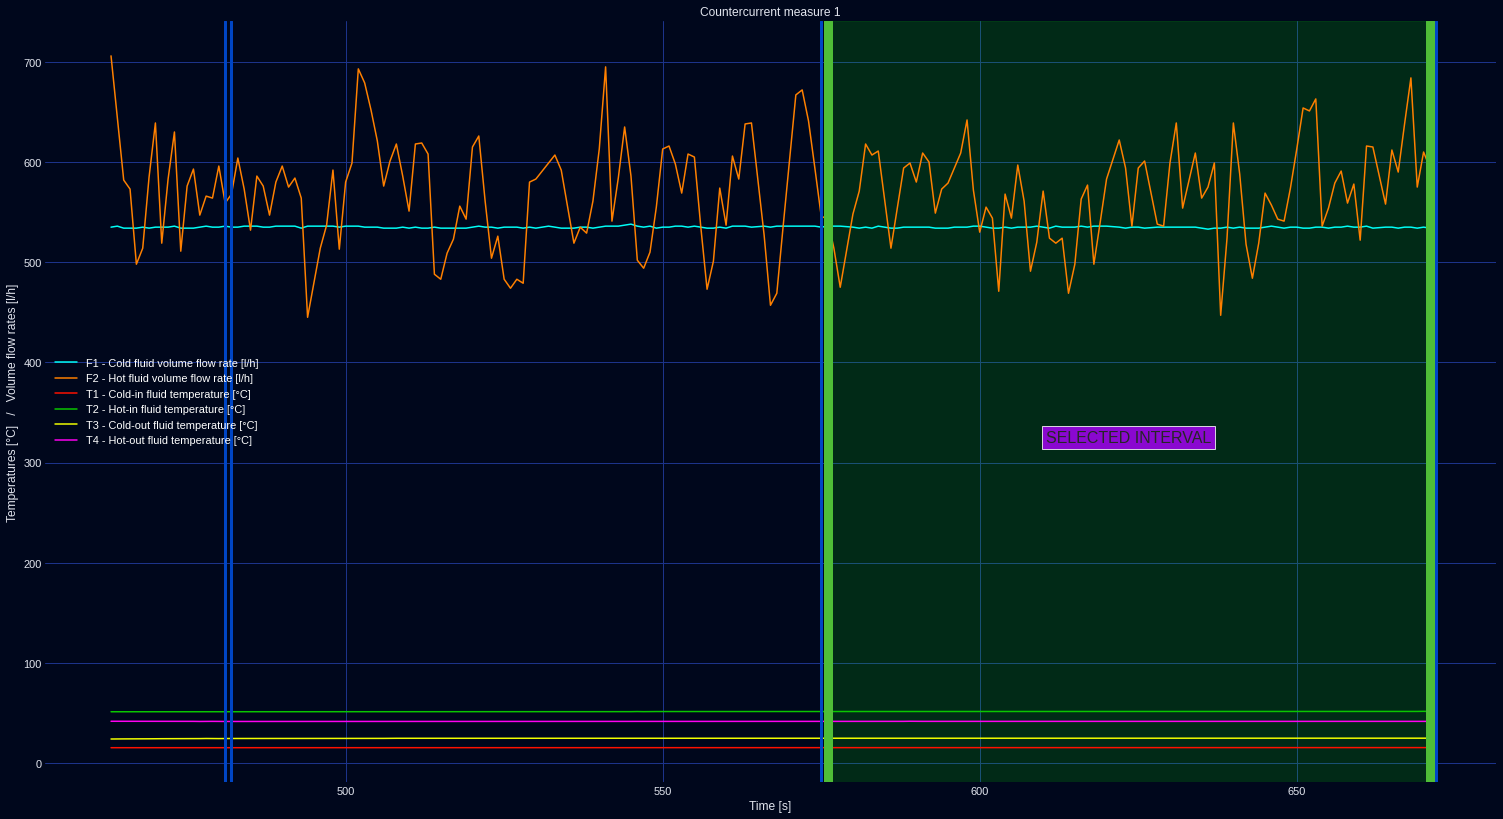

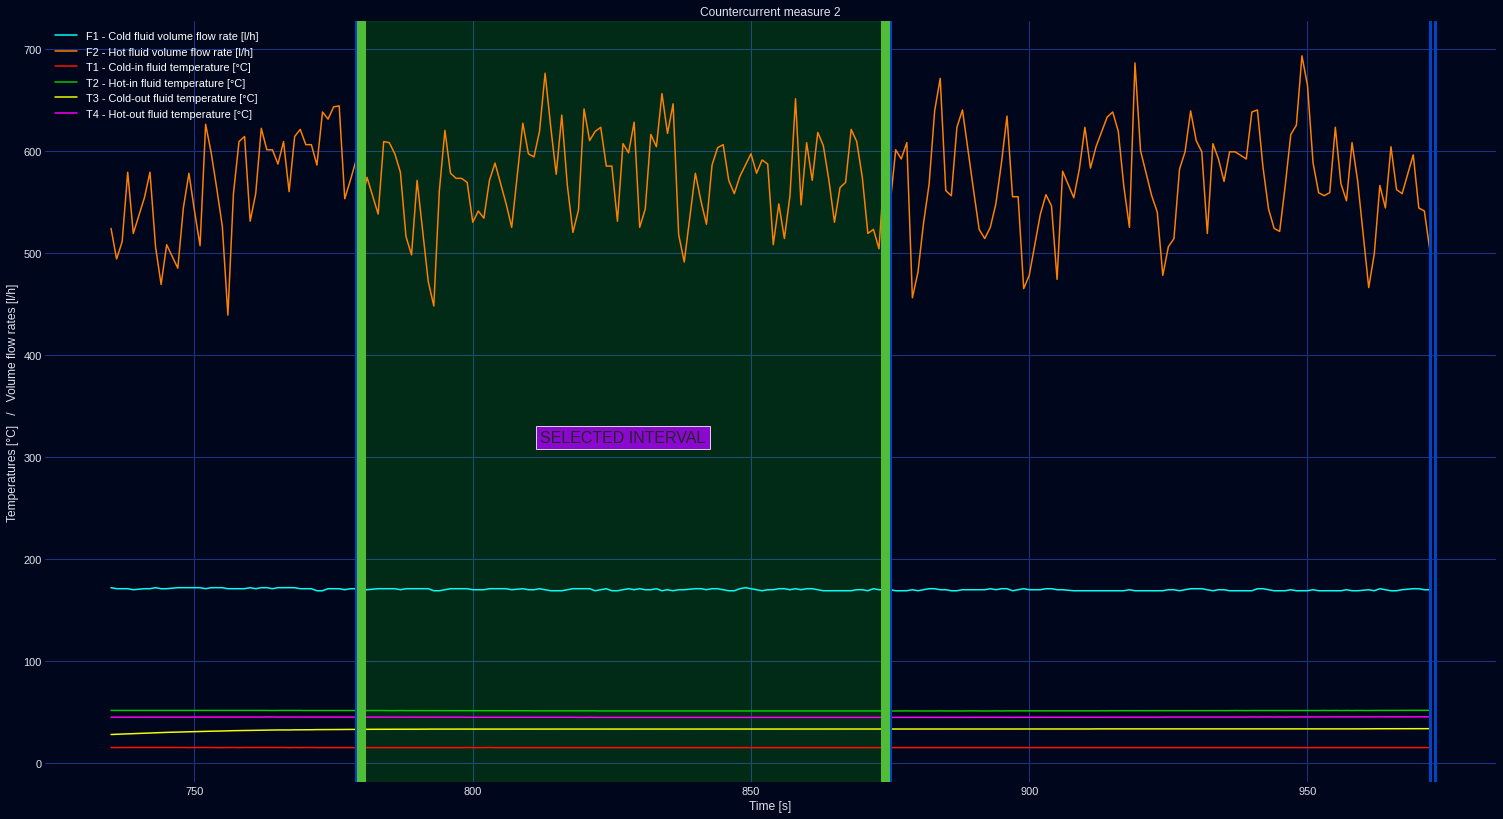

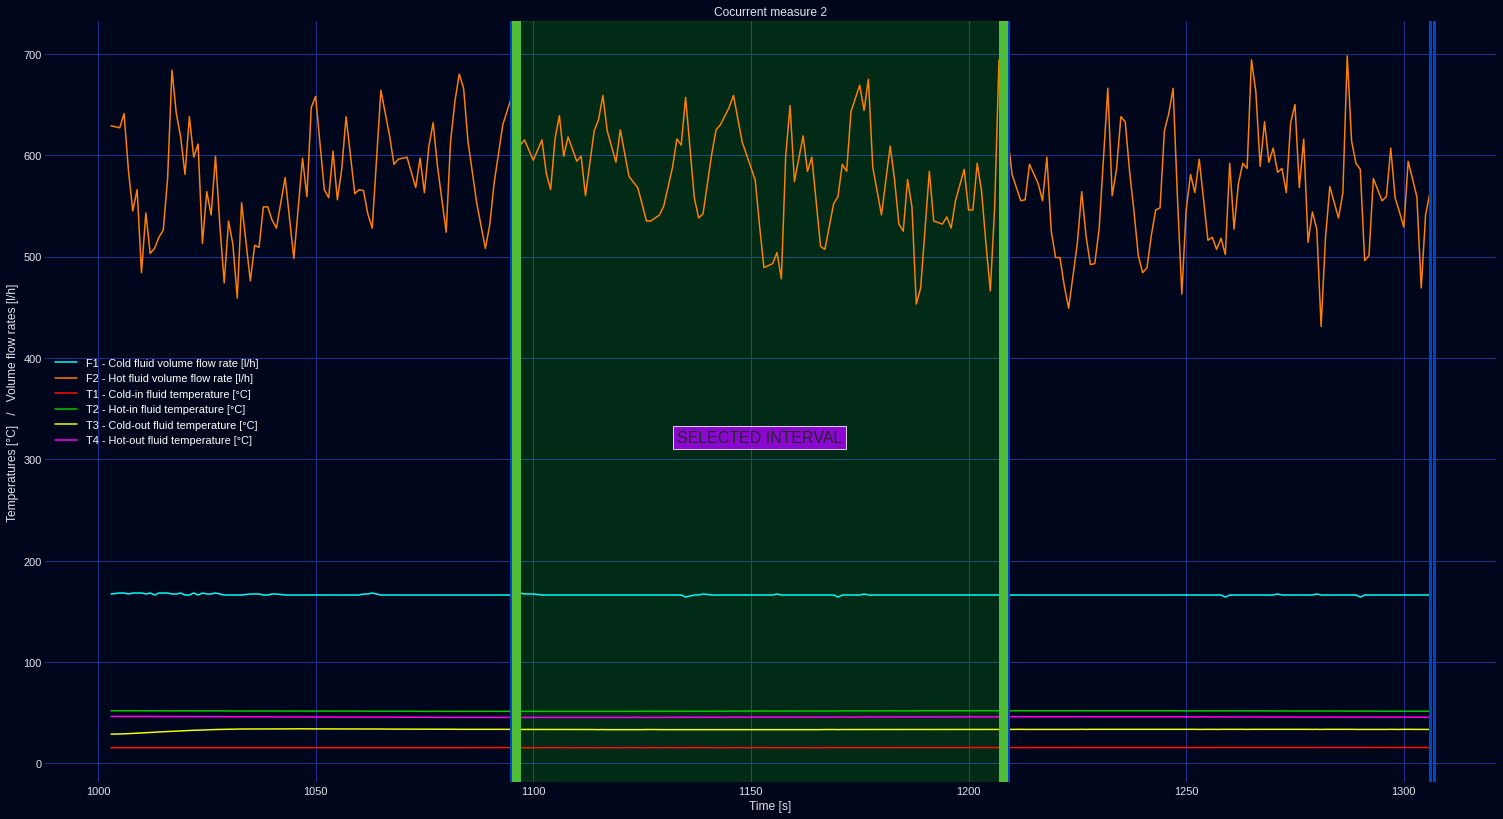

<Figure size 1872x1008 with 0 Axes>

In [29]:
sc_dbg_flg = True                                                                                       # Steady conditions debug flag (set to True in order to consult functions output)
sc_db_span = 90                                                                                         # Steady conditions datablocks span (in samples)

sc_windows = list()                                                                                     # New steady-conditions data windows list definition and following definition
idx = 0                                                                                                 # Measure index
for he_data_measure in he_data_measures:                                                                # Heat-exchanger data measures scrollin' cycle
  sc_windows.append(da.find_stdy_cond_plt(he_data_measure, sc_db_span, sc_dbg_flg, da.meas_names[idx])) # Function call to find and plot optimal steady conditions data window for each heat-exchanger data measure
  idx += 1                                                                                              # Measure index upd

### - Measured variables definition

* Determine measured variables values by calculating mean value in steady-conditions datablock window

In [30]:
mean_vals_dbg_flg = True                                                                                # Mean vals debug flag (set to True in order to consult output)

measures = list()                                                                                       # New measures list declaration and following definition
idx = 0                                                                                                 # Measure index
for sc_win in sc_windows:                                                                               # Steady-conditions data windows scrollin' cycle
  measures.append(da.calc_meas_vars_vals(sc_win))                                                       # Determine measured variables values during measures and define elements in new measures list
  if (mean_vals_dbg_flg):                                                                               # If dbg flg is ena
    print("\n--> "+da.meas_names[idx]+" mean vals:")                                                    # Print dbg fbk
    print("F1[l/h]: "+str(measures[idx].f1))                                                            # Print dbg fbk
    print("F2[l/h]: "+str(measures[idx].f2))                                                            # Print dbg fbk
    print("T1[°C]: "+str(measures[idx].t1))                                                             # Print dbg fbk
    print("T2[°C]: "+str(measures[idx].t2))                                                             # Print dbg fbk
    print("T3[°C]: "+str(measures[idx].t3))                                                             # Print dbg fbk
    print("T4[°C]: "+str(measures[idx].t4))                                                             # Print dbg fbk
    idx += 1                                                                                            # Measure index upd


--> Cocurrent measure 1 mean vals:
F1[l/h]: 539.9222222222222
F2[l/h]: 562.5222222222222
T1[°C]: 15.254444444444452
T2[°C]: 51.24088888888886
T3[°C]: 24.349777777777817
T4[°C]: 41.90299999999992

--> Countercurrent measure 1 mean vals:
F1[l/h]: 534.8333333333334
F2[l/h]: 568.4111111111112
T1[°C]: 15.413333333333329
T2[°C]: 51.51888888888898
T3[°C]: 24.821111111111083
T4[°C]: 41.686666666666596

--> Countercurrent measure 2 mean vals:
F1[l/h]: 170.2111111111111
F2[l/h]: 574.2333333333333
T1[°C]: 15.33355555555554
T2[°C]: 51.29666666666669
T3[°C]: 33.513222222222204
T4[°C]: 45.01066666666657

--> Cocurrent measure 2 mean vals:
F1[l/h]: 166.03333333333333
F2[l/h]: 578.8333333333334
T1[°C]: 15.414222222222243
T2[°C]: 51.46877777777776
T3[°C]: 33.24355555555555
T4[°C]: 45.49700000000002


## Thermophysics variables

* Import datasets data from (.csv) table files, creating 'DataFrames' variables

In [31]:
air_atmp = pd.read_csv(pa.csv_air_atmp_filepath, sep=da.csv_sep_chr, encoding="utf8")                   # Import data from (.csv) dataset and create a new panda (lib) DataFrame variable: 'air_atmp'
water = pd.read_csv(pa.csv_water_filepath, sep=da.csv_sep_chr, encoding="utf8")                         # Import data from (.csv) dataset and create a new panda (lib) DataFrame variable: 'water'
#aisi_316 = pd.read_csv(pa.csv_aisi_316_filepath, sep=da.csv_sep_chr, encoding="utf8")                   # Import data from (.csv) dataset and create a new panda (lib) DataFrame variable: 'aisi_316'

### - Air thermophysics variables interpolation/fitting at atm pressure

* Extract air interpolation/fitting temperatures (at atm pressure) from dataset and define the number of interpolation/fitting points to plot

In [32]:
air_atmp_temp = np.array(air_atmp[pa.temp_col])                                                         # Temperatures array for air thermophysics variables at atm pressure
air_atmp_intp_typ = "cubic"                                                                             # Air thermophysics variables at atm pressure interpolation type
air_atmp_intp_fit_pts = 1000                                                                            # Air thermophysics variables at atm pressure number of interpolation/fitting plotting points

* Function definition to apply air density fitting/interpolation (at atm pressure)

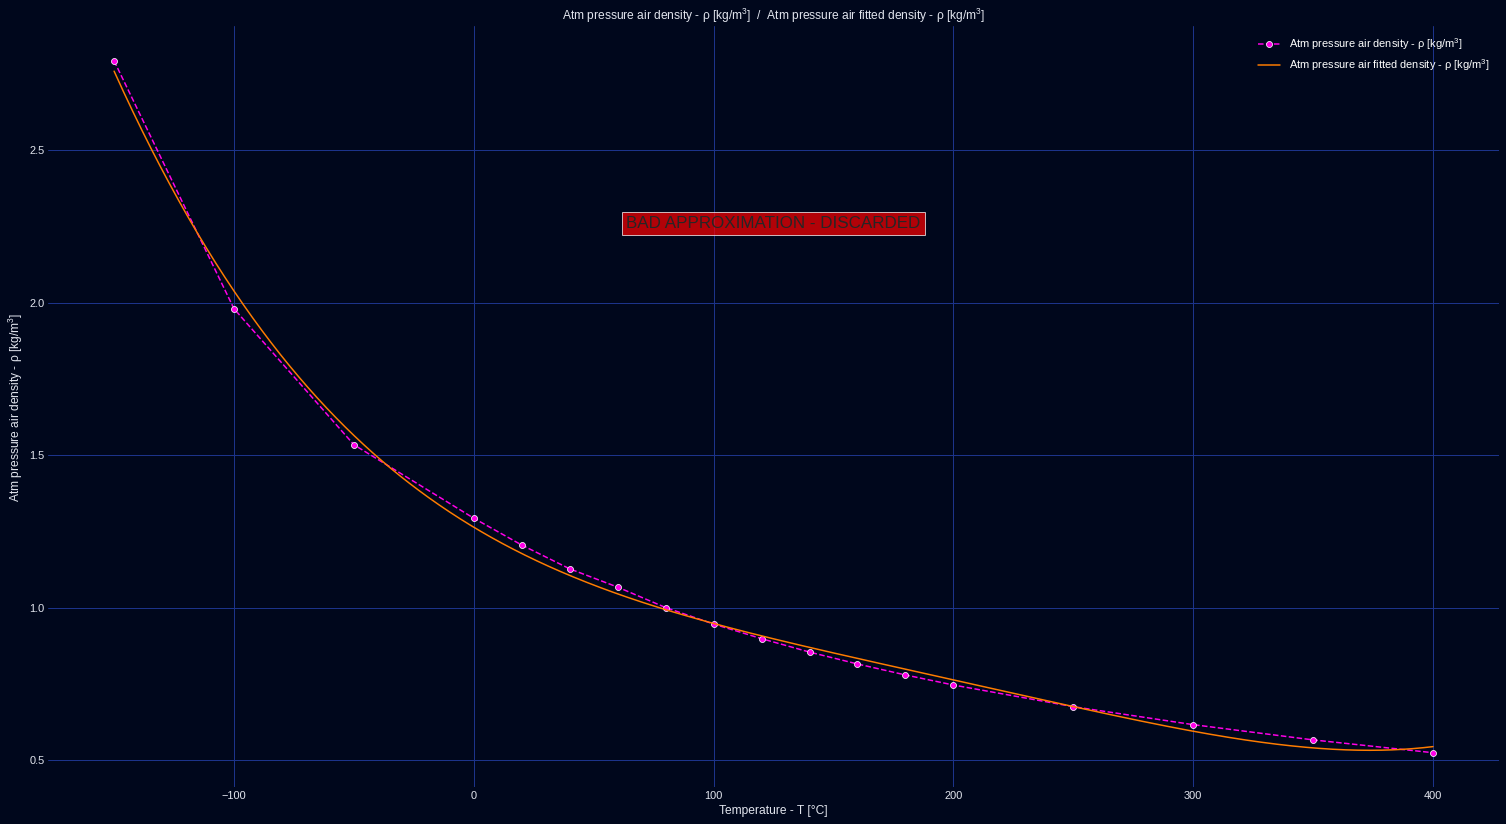

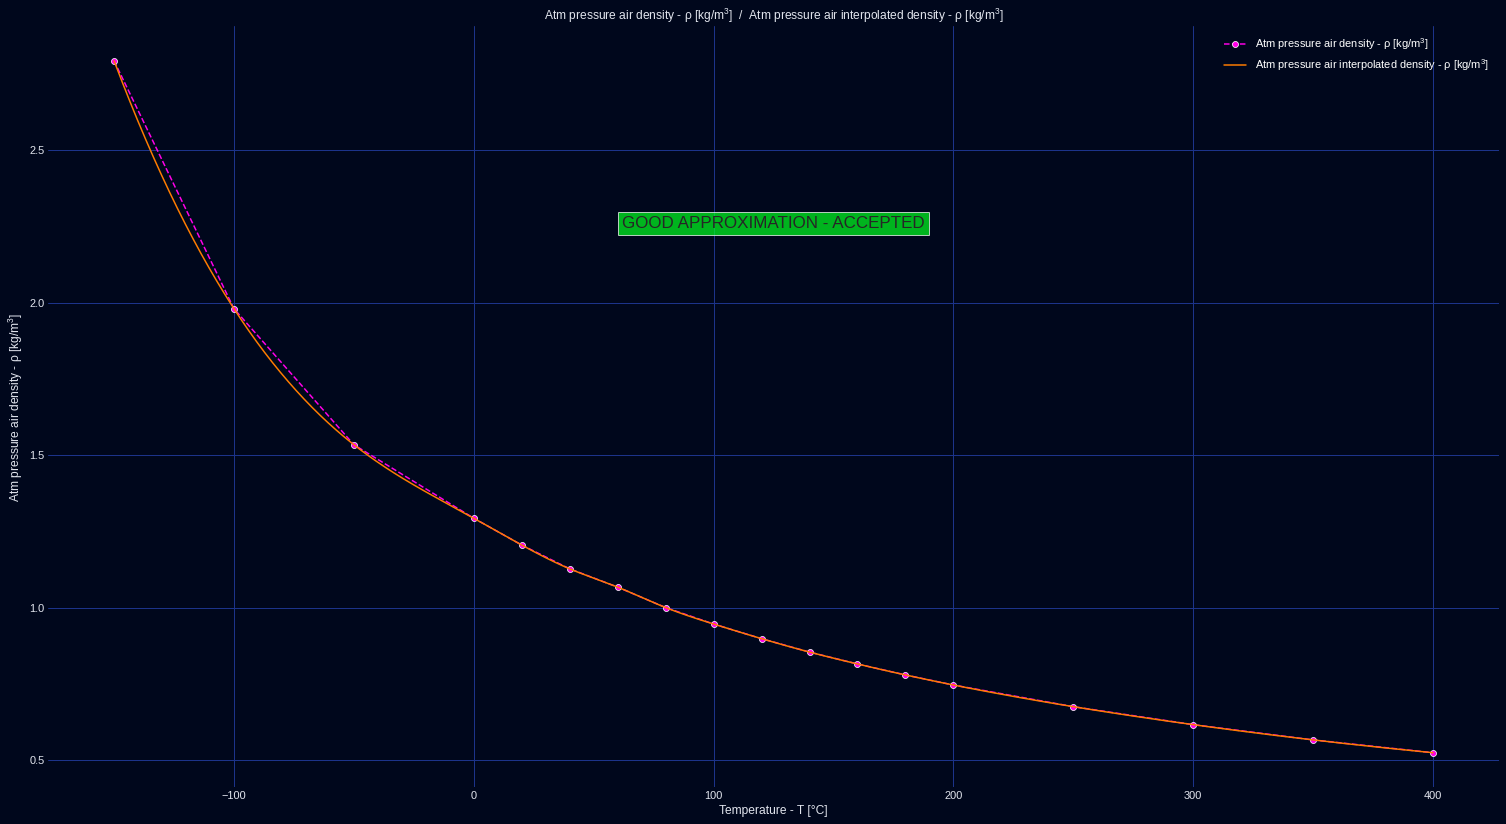

<Figure size 1872x1008 with 0 Axes>

In [33]:
air_atmp_rho = np.array(air_atmp[pa.rho_col])                                                           # Air density array (thermophysic variable at atm pressure vs temp)

# Poly-fitting discarded, bad approximation
f_air_atmp_rho, x, y = pa.poly_approx(air_atmp_temp, air_atmp_rho, pa.Poly_approx_md.fit, 4)            # Air density fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_rho, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_rho_lbl, pl.plt_fit_rho_lbl, pl.Poly_approx_res.disc, 0.6)                       # Function call to plot air density and curve-fitting (thermophysic variable at atm pressure vs temp)

# Poly-interpolation accepted, good approximation
f_air_atmp_rho, x, y = pa.poly_approx(air_atmp_temp, air_atmp_rho,
                                      pa.Poly_approx_md.int, air_atmp_intp_typ)                         # Air density interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_rho, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_rho_lbl, pl.plt_intp_rho_lbl, pl.Poly_approx_res.acc, 0.6)                       # Function call to plot air density and interpolation (thermophysic variable at atm pressure vs temp)

* Function definition to apply air specific heat at constant pressure interpolation/fitting (at atm pressure)

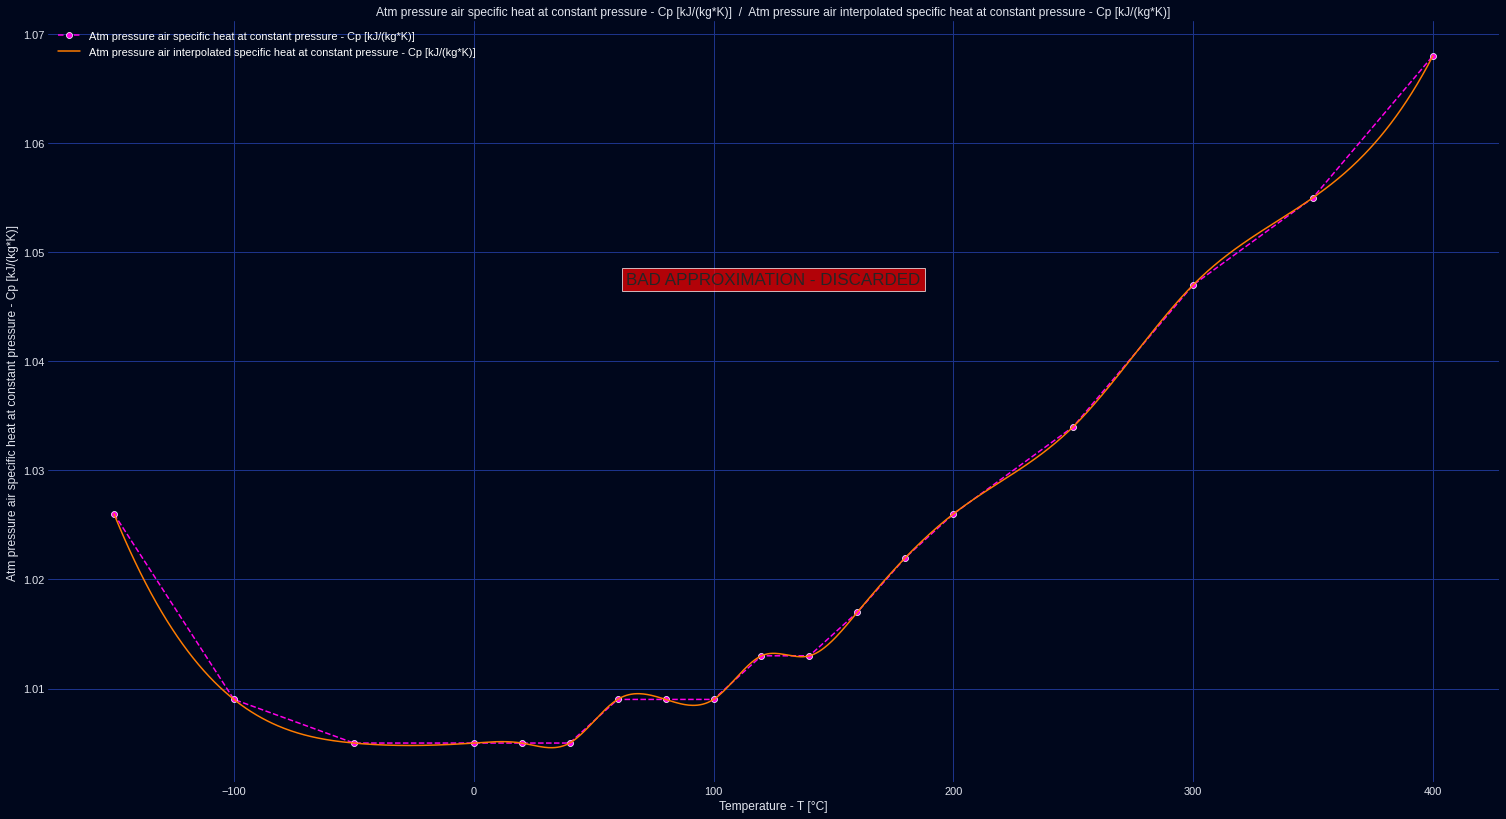

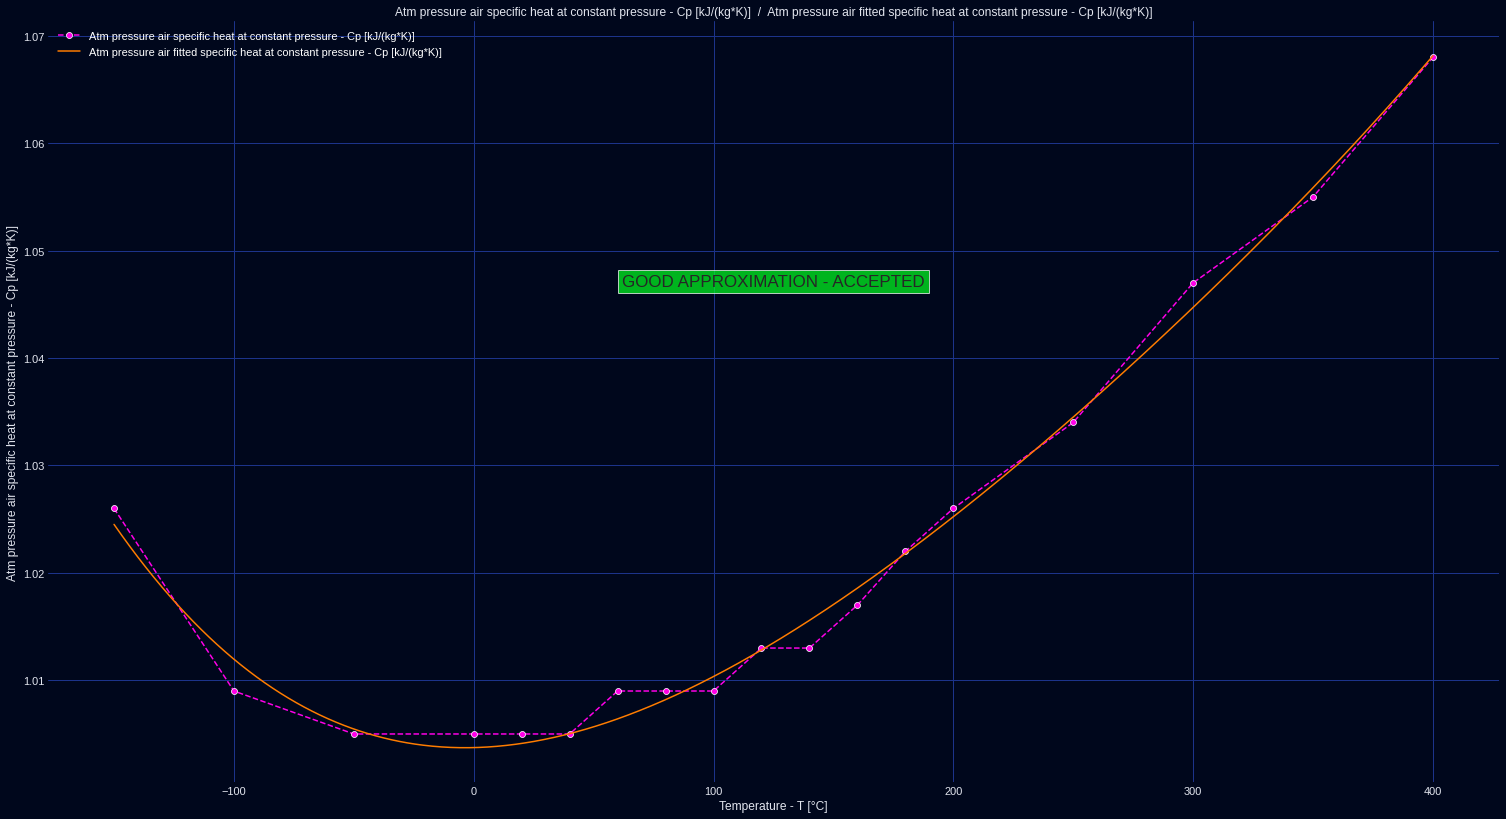

<Figure size 1872x1008 with 0 Axes>

In [34]:
air_atmp_cp = np.array(air_atmp[pa.cp_col])                                                             # Air specific heat at constant pressure array (thermophysic variable at atm pressure vs temp)

# Poly-interpolation discarded, bad approximation
f_air_atmp_cp, x, y = pa.poly_approx(air_atmp_temp, air_atmp_cp,
                                     pa.Poly_approx_md.int, air_atmp_intp_typ)                          # Air specific heat at constant pressure interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_cp, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_cp_lbl, pl.plt_intp_cp_lbl, pl.Poly_approx_res.disc, 1.12*1e-2)                  # Function call to plot air specific heat at constant pressure and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_air_atmp_cp, x, y = pa.poly_approx(air_atmp_temp, air_atmp_cp, pa.Poly_approx_md.fit, 4)              # Air specific heat at constant pressure fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_cp, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_cp_lbl, pl.plt_fit_cp_lbl, pl.Poly_approx_res.acc, 1.12*1e-2)                    # Function call to plot air specific heat at constant pressure and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply air thermal conductivity interpolation/fitting (at atm pressure)

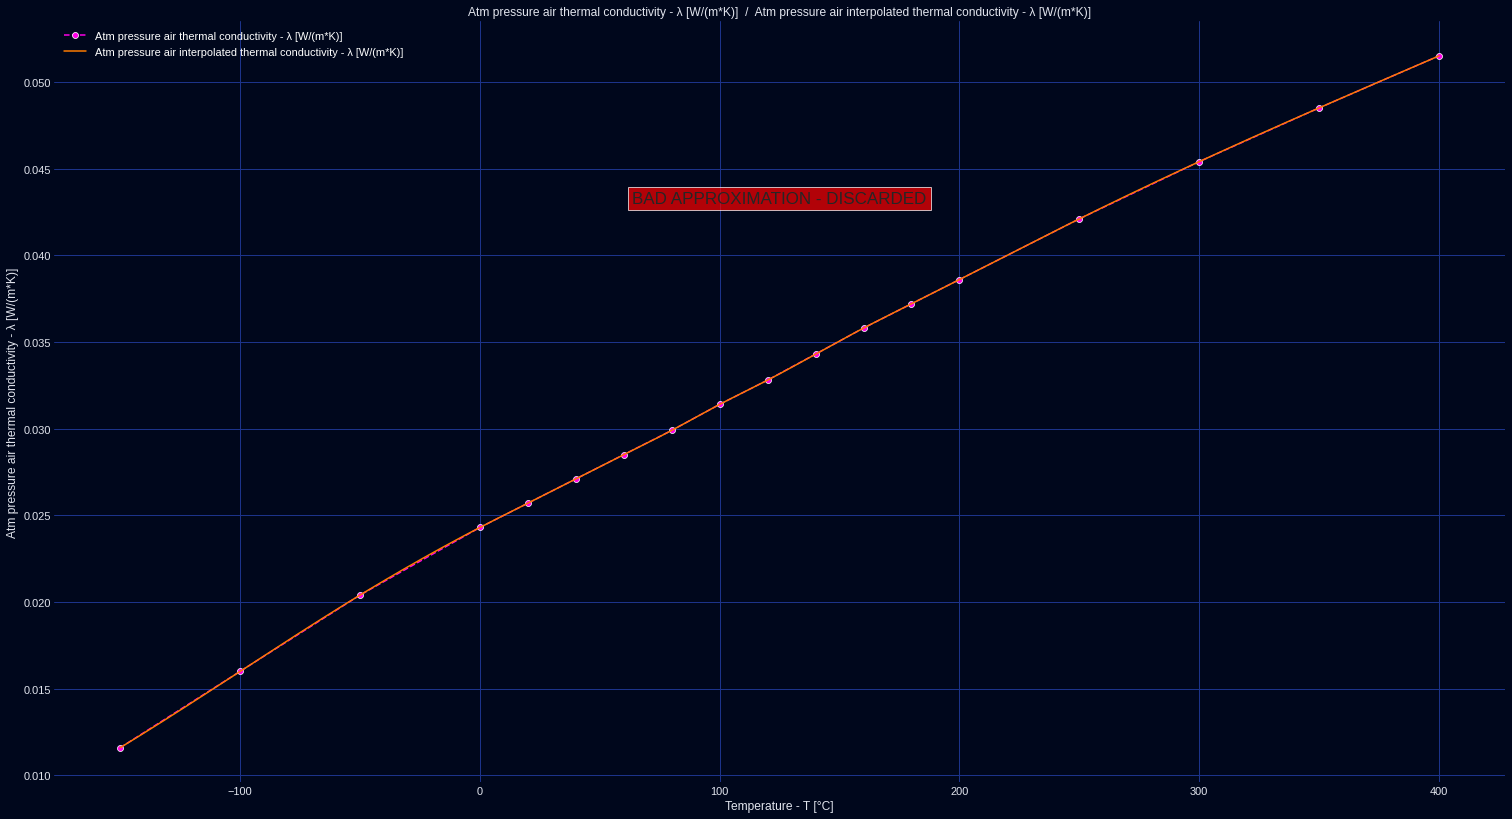

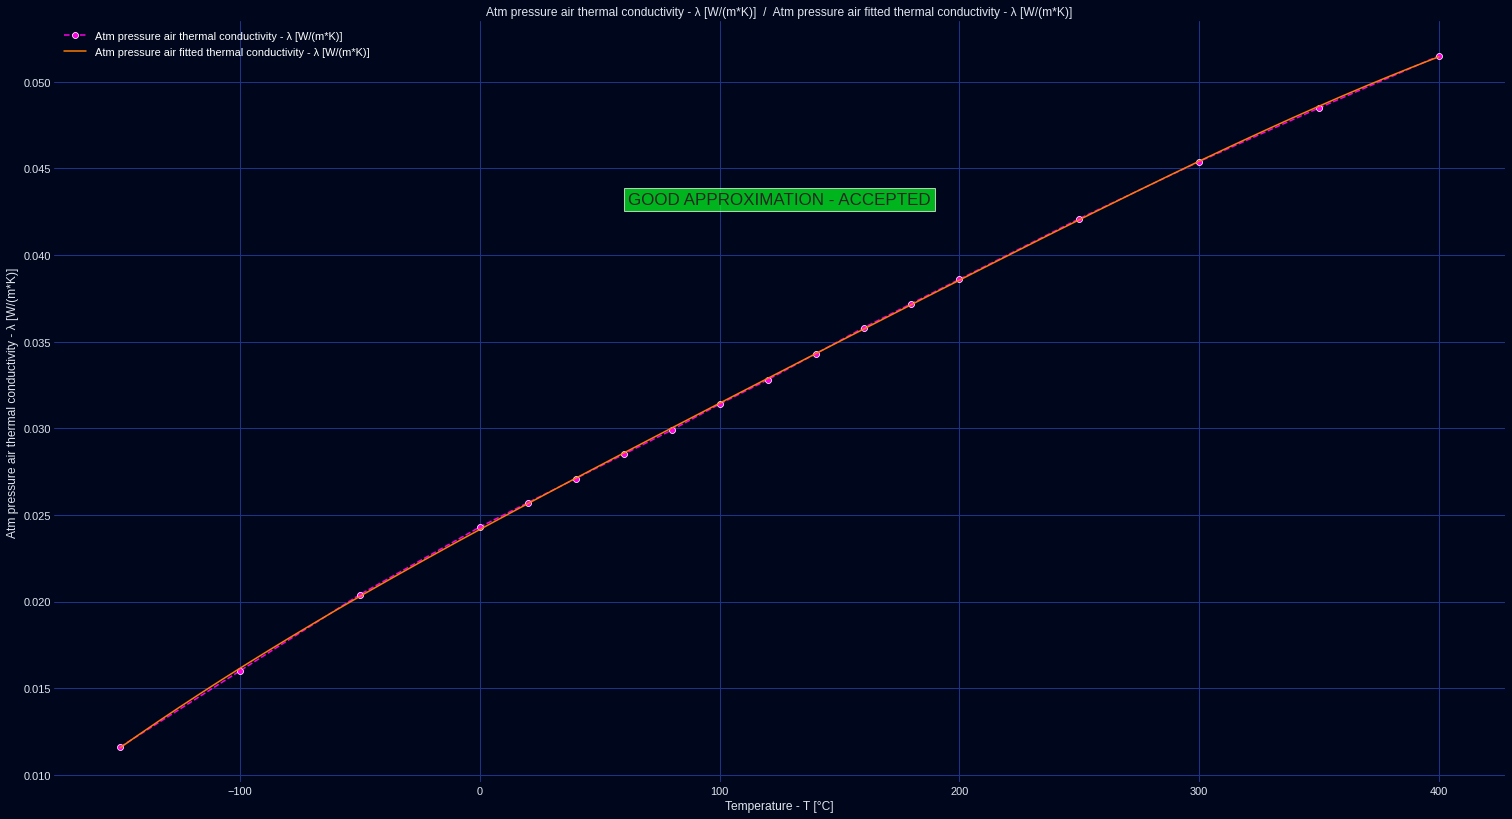

<Figure size 1872x1008 with 0 Axes>

In [35]:
air_atmp_lambda = np.array(air_atmp[pa.lambda_col])                                                     # Air thermal conductivity array (thermophysic variable at atm pressure vs temp)

# Poly-interpolation discarded, bad approximation
f_air_atmp_lambda, x, y = pa.poly_approx(air_atmp_temp, air_atmp_lambda,
                                         pa.Poly_approx_md.int, air_atmp_intp_typ)                      # Air thermal conductivity interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_lambda, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp,
                pl.plt_temp_lbl, pl.plt_lambda_lbl, pl.plt_intp_lambda_lbl,
                pl.Poly_approx_res.disc, 1.17*1e-2)                                                     # Function call to plot air thermal conductivity and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_air_atmp_lambda, x, y = pa.poly_approx(air_atmp_temp, air_atmp_lambda, pa.Poly_approx_md.fit, 4)      # Air thermal conductivity fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_lambda, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp,
                pl.plt_temp_lbl, pl.plt_lambda_lbl, pl.plt_fit_lambda_lbl,
                pl.Poly_approx_res.acc, 1.17*1e-2)                                                      # Function call to plot air thermal conductivity and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply air kinematic viscosity interpolation/fitting (at atm pressure)

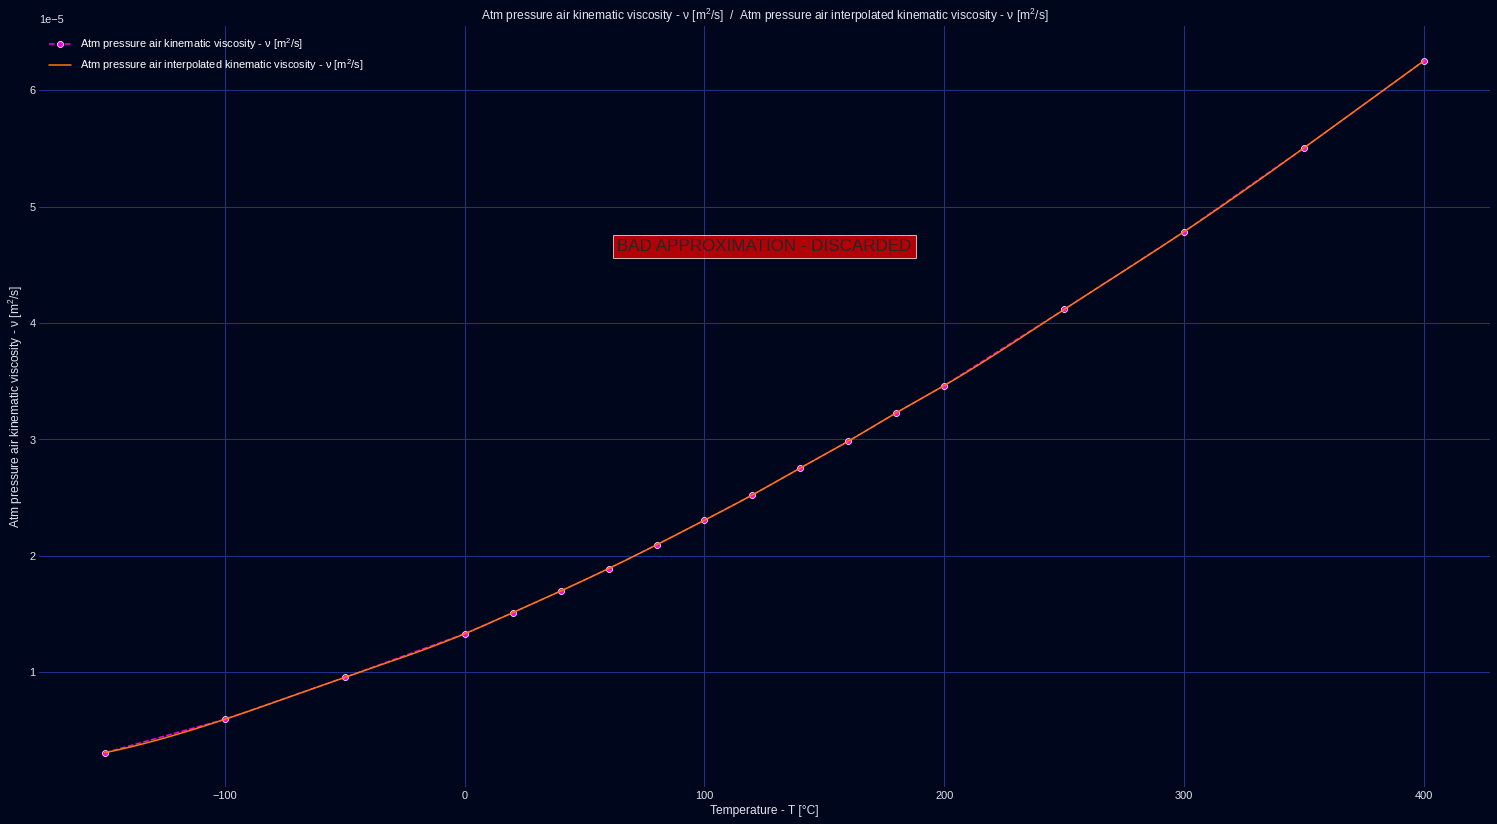

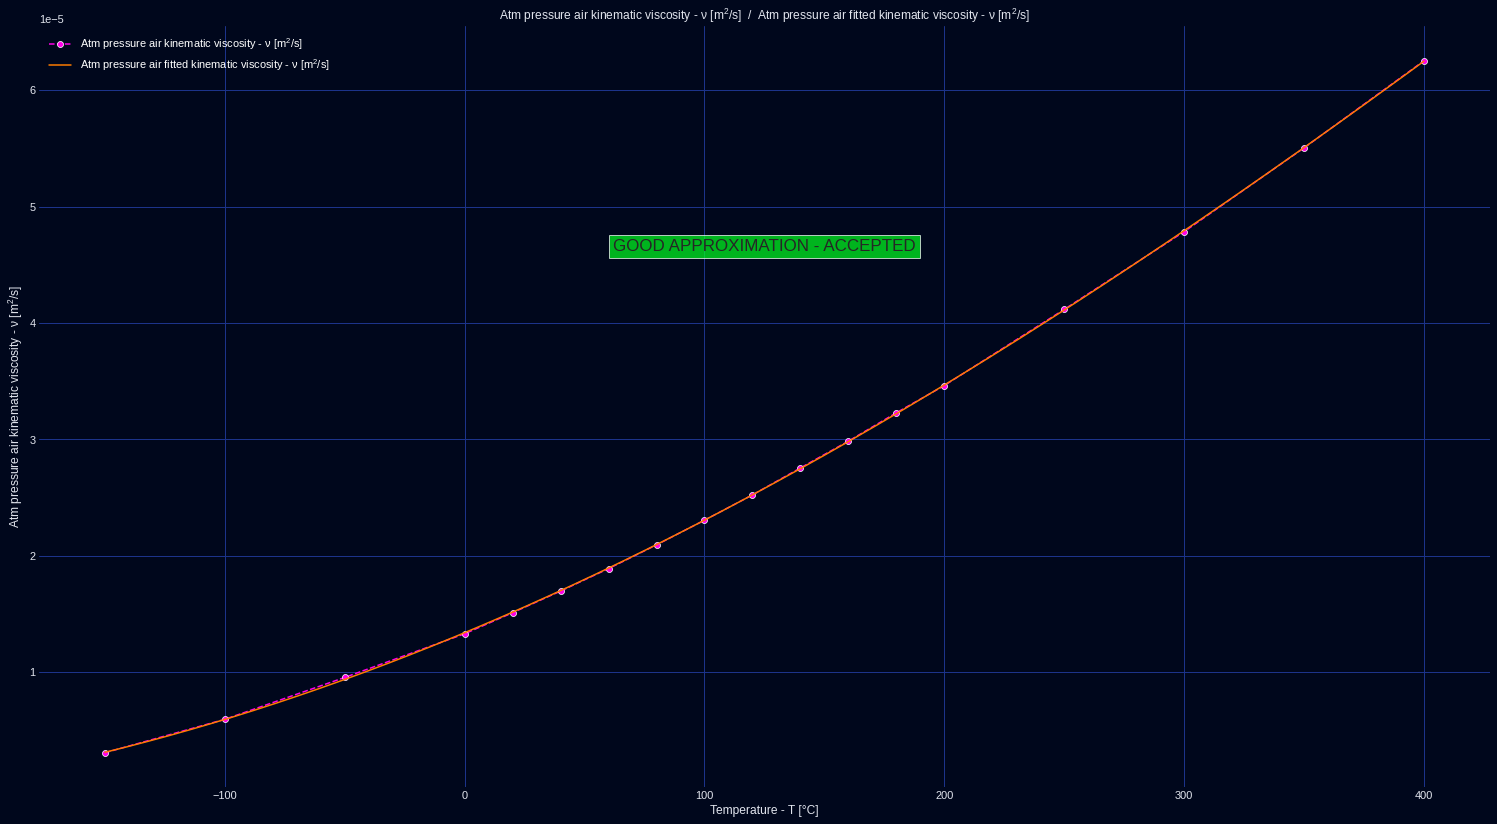

<Figure size 1872x1008 with 0 Axes>

In [36]:
air_atmp_ni = np.array(air_atmp[pa.ni_col])                                                             # Air kinematic viscosity array (thermophysic variable at atm pressure vs temp)

# Poly-interpolation discarded, bad approximation
f_air_atmp_ni, x, y = pa.poly_approx(air_atmp_temp, air_atmp_ni,
                                     pa.Poly_approx_md.int, air_atmp_intp_typ)                          # Air kinematic viscosity interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_ni, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_ni_lbl, pl.plt_intp_ni_lbl, pl.Poly_approx_res.disc, 1.38*1e-5)                  # Function call to plot air kinematic viscosity and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_air_atmp_ni, x, y = pa.poly_approx(air_atmp_temp, air_atmp_ni, pa.Poly_approx_md.fit, 4)              # Air kinematic viscosity fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_ni, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_ni_lbl, pl.plt_fit_ni_lbl, pl.Poly_approx_res.acc, 1.38*1e-5)                    # Function call to plot air kinematic viscosity and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply air thermodynamic beta (Coldness) fitting/interpolation (at atm pressure)

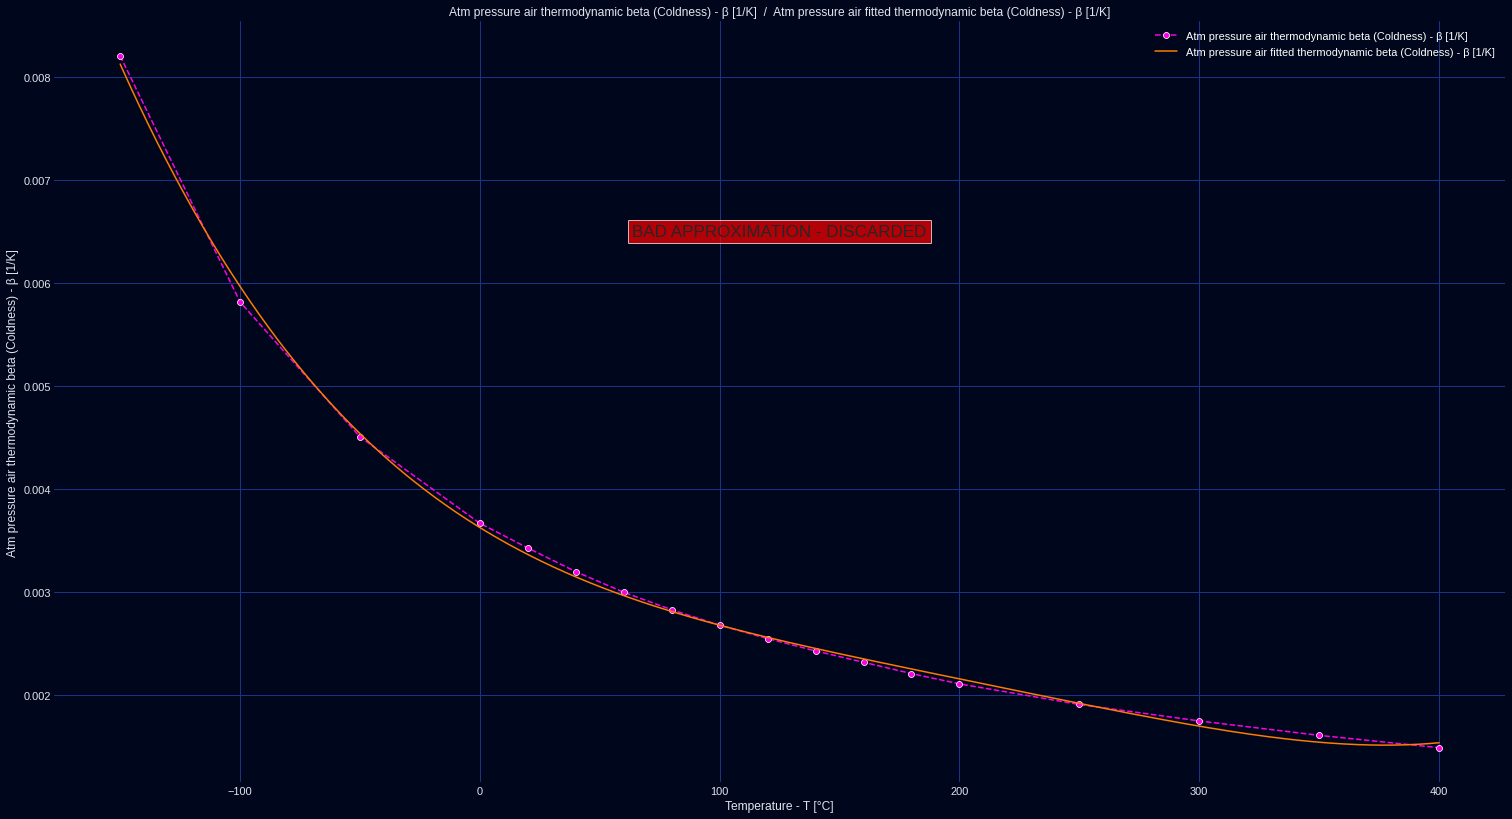

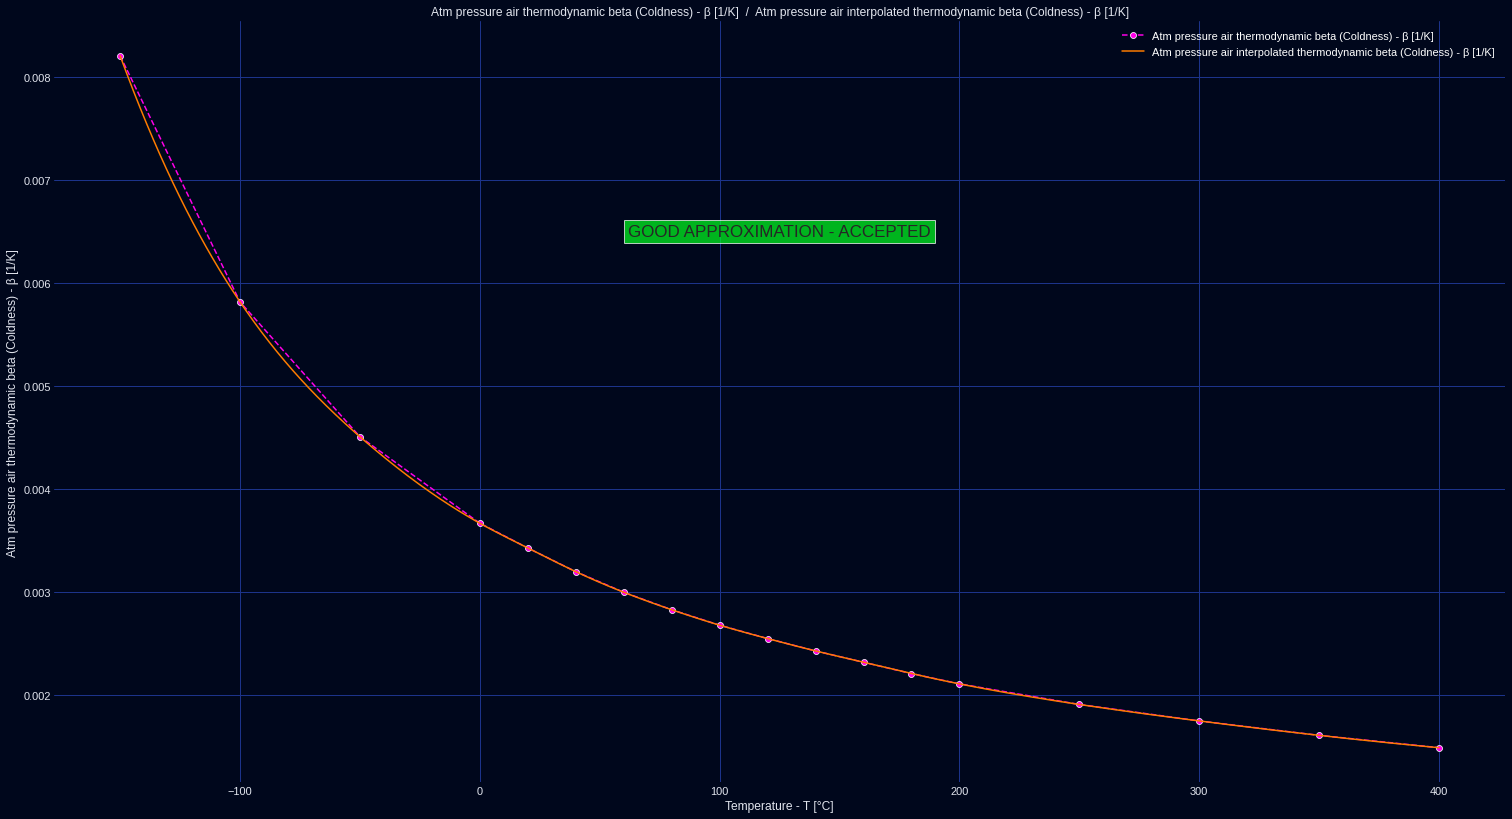

<Figure size 1872x1008 with 0 Axes>

In [37]:
air_atmp_beta = np.array(air_atmp[pa.beta_col])                                                         # Air thermodynamic beta (Coldness) array (thermophysic variable at atm pressure vs temp)

# Poly-fitting discarded, bad approximation
f_air_atmp_beta, x, y = pa.poly_approx(air_atmp_temp, air_atmp_beta, pa.Poly_approx_md.fit, 4)          # Air thermodynamic beta (Coldness) fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_beta, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp,
                pl.plt_temp_lbl, pl.plt_beta_lbl, pl.plt_fit_beta_lbl,
                pl.Poly_approx_res.disc, 1.65*1e-3)                                                     # Function call to plot air thermodynamic beta (Coldness) and curve-fitting (thermophysic variable at atm pressure vs temp)

# Poly-interpolation accepted, good approximation
f_air_atmp_beta, x, y = pa.poly_approx(air_atmp_temp, air_atmp_beta,
                                       pa.Poly_approx_md.int, air_atmp_intp_typ)                        # Air thermodynamic beta (Coldness) interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_beta, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp,
                pl.plt_temp_lbl, pl.plt_beta_lbl, pl.plt_intp_beta_lbl,
                pl.Poly_approx_res.acc, 1.65*1e-3)                                                      # Function call to plot air thermodynamic beta (Coldness) and interpolation (thermophysic variable at atm pressure vs temp)

* Function definition to apply air Prandtl number interpolation/fitting (at atm pressure)

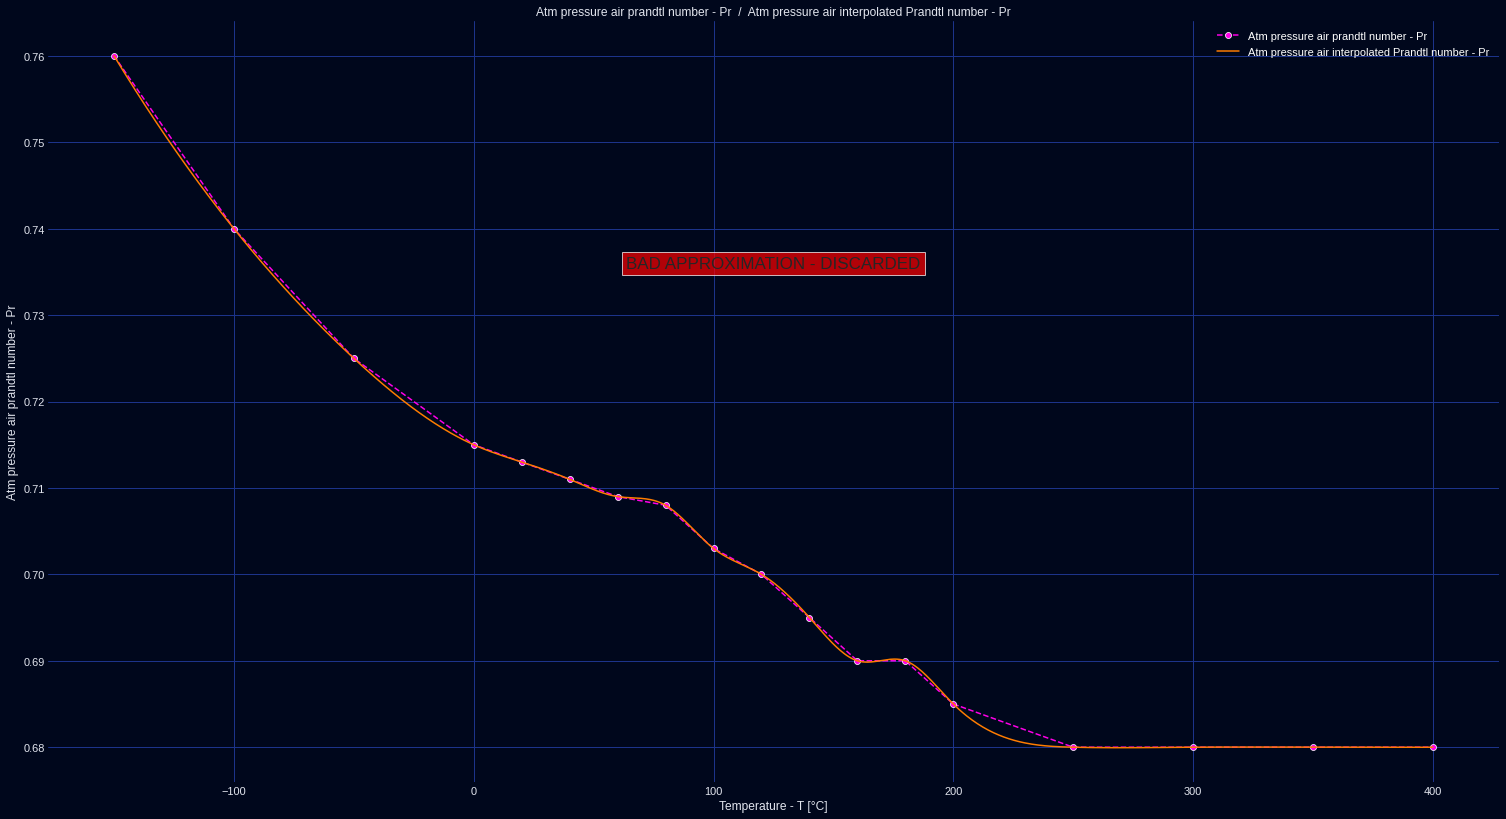

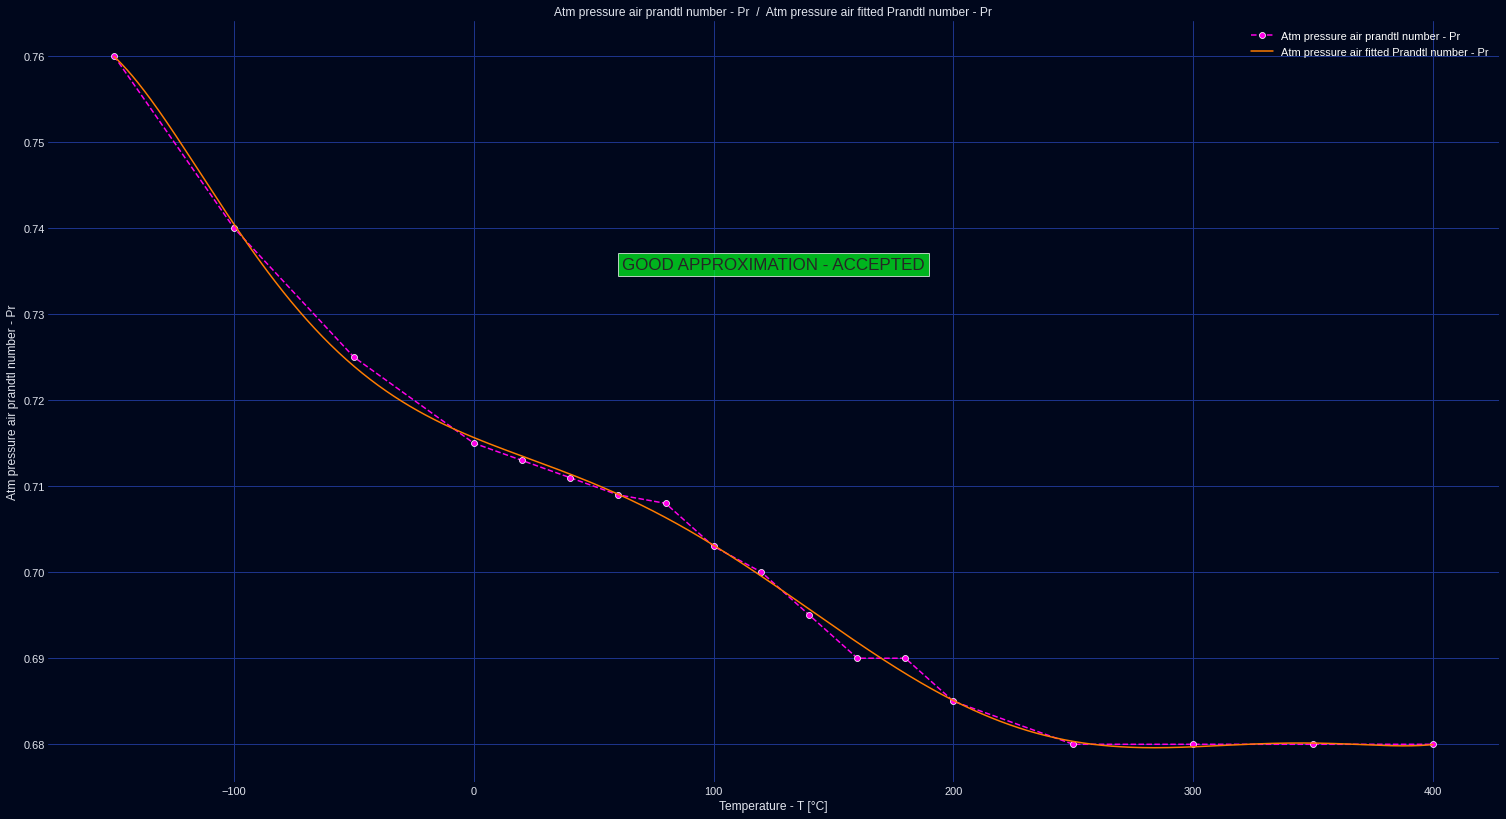

<Figure size 1872x1008 with 0 Axes>

In [38]:
air_atmp_pr = np.array(air_atmp[pa.pr_col])                                                             # Air Prandtl number array (thermophysic variable at atm pressure vs temp)

# Poly-interpolation discarded, bad approximation
f_air_atmp_pr, x, y = pa.poly_approx(air_atmp_temp, air_atmp_pr,
                                     pa.Poly_approx_md.int, air_atmp_intp_typ)                          # Air Prandtl number interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_pr, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_pr_lbl, pl.plt_intp_pr_lbl, pl.Poly_approx_res.disc, 1.6*1e-2)                   # Function call to plot air Prandtl number and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_air_atmp_pr, x, y = pa.poly_approx(air_atmp_temp, air_atmp_pr, pa.Poly_approx_md.fit, 7)              # Air Prandtl number fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_air_atmp_pr, air_atmp_intp_fit_pts, pl.Fluid_type.air_atmp, pl.plt_temp_lbl,
                pl.plt_pr_lbl, pl.plt_fit_pr_lbl, pl.Poly_approx_res.acc, 1.6*1e-2)                     # Function call to plot air Prandtl number and curve-fitting (thermophysic variable at atm pressure vs temp)

### - Water thermophysics variables interpolation/fitting

* Extract water interpolation/fitting temperatures from dataset and define the number of interpolation/fitting points to plot

In [39]:
water_temp = np.array(water[pa.temp_col])                                                               # Temperatures array for water thermophysics variables
water_intp_typ = "cubic"                                                                                # Water thermophysics variables interpolation type
water_intp_fit_pts = 1000                                                                               # Water thermophysics variables number of interpolation/fitting plotting points

* Function definition to apply water density interpolation/fitting

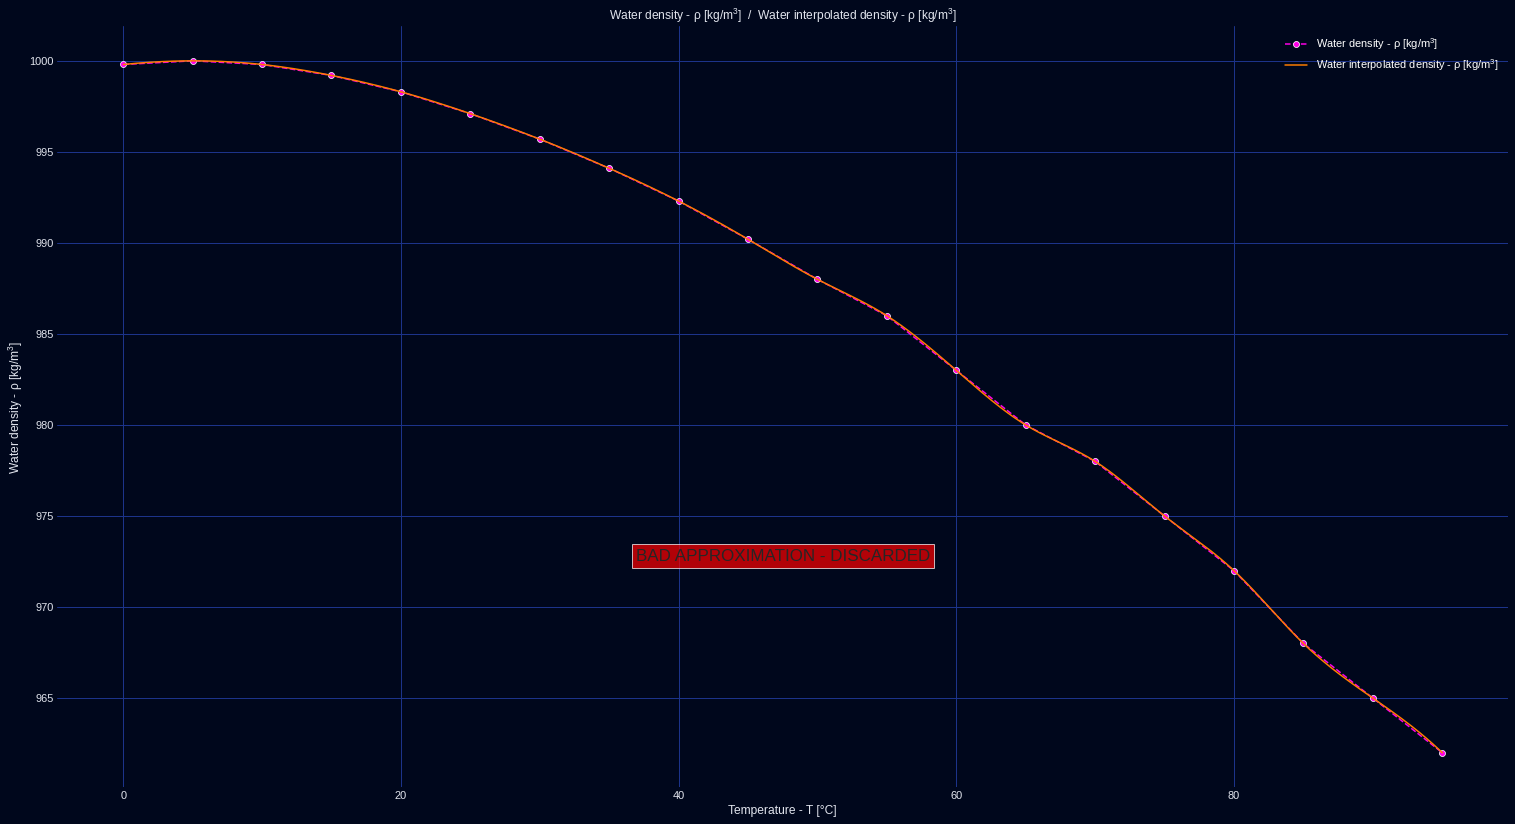

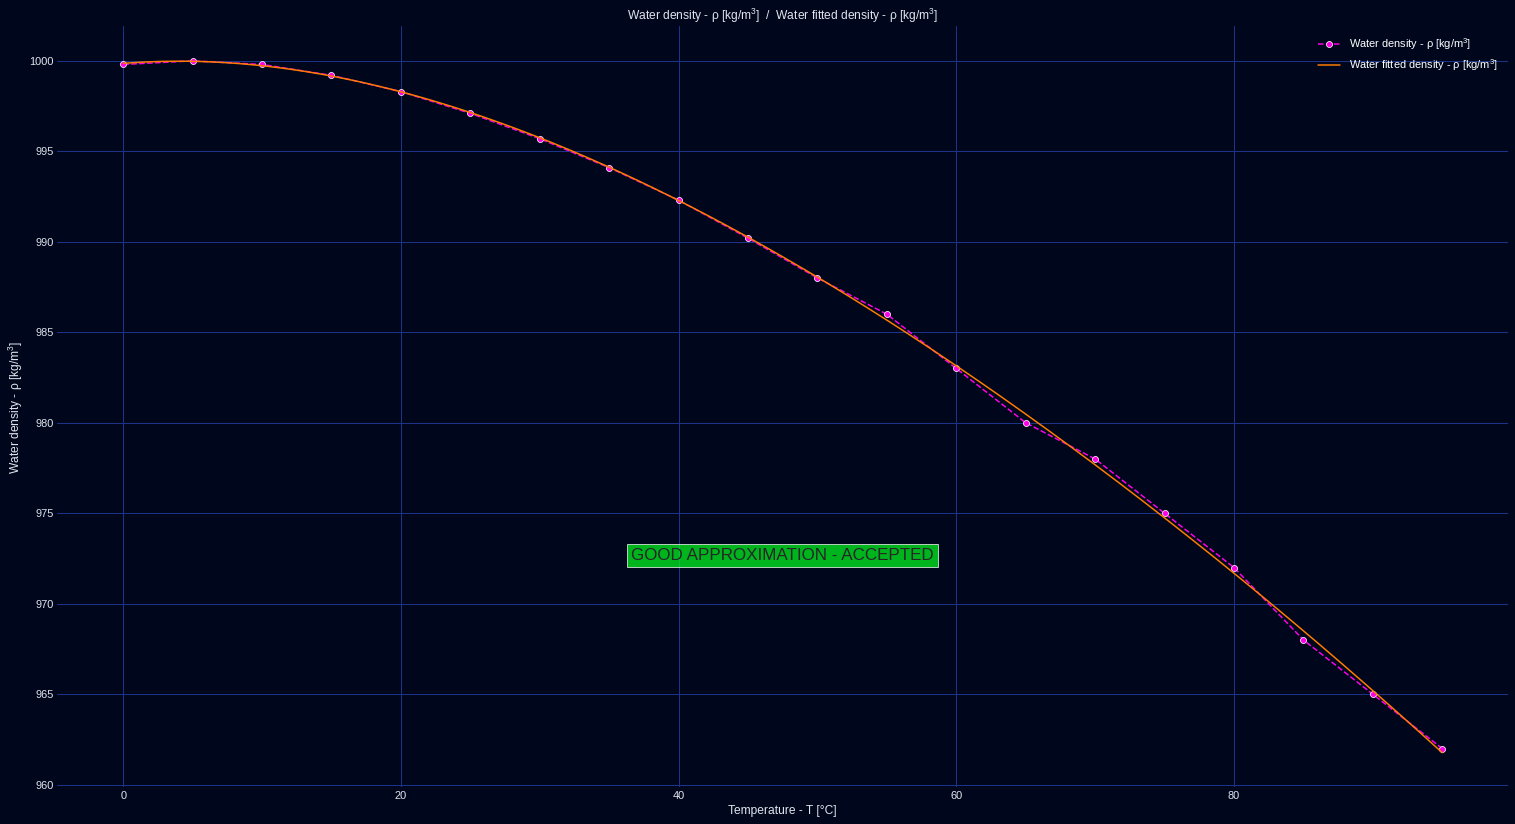

<Figure size 1872x1008 with 0 Axes>

In [40]:
water_rho = np.array(water[pa.rho_col])                                                                 # Water density array (thermophysic variable at atm pressure vs temp)

# Poly-interpolation discarded, bad approximation
f_water_rho, x, y = pa.poly_approx(water_temp, water_rho, pa.Poly_approx_md.int, water_intp_typ)        # Water density interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_rho, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_rho_lbl, pl.plt_intp_rho_lbl, pl.Poly_approx_res.disc, -8.2)                     # Function call to plot water density and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_water_rho, x, y = pa.poly_approx(water_temp, water_rho, pa.Poly_approx_md.fit, 4)                     # Water density fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_rho, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_rho_lbl, pl.plt_fit_rho_lbl, pl.Poly_approx_res.acc, -8.2)                       # Function call to plot water density and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply water specific heat at constant pressure interpolation/fitting

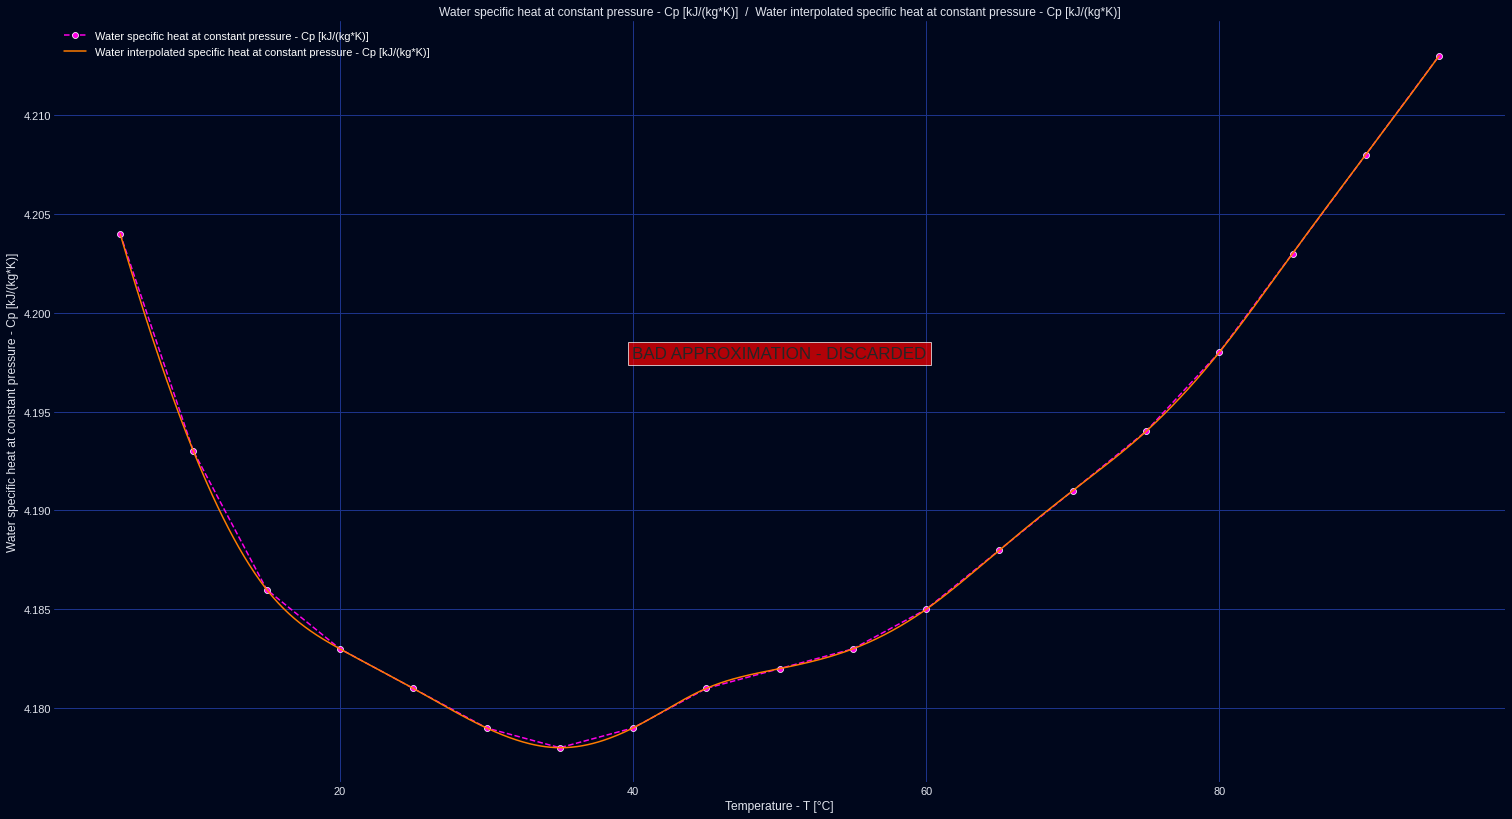

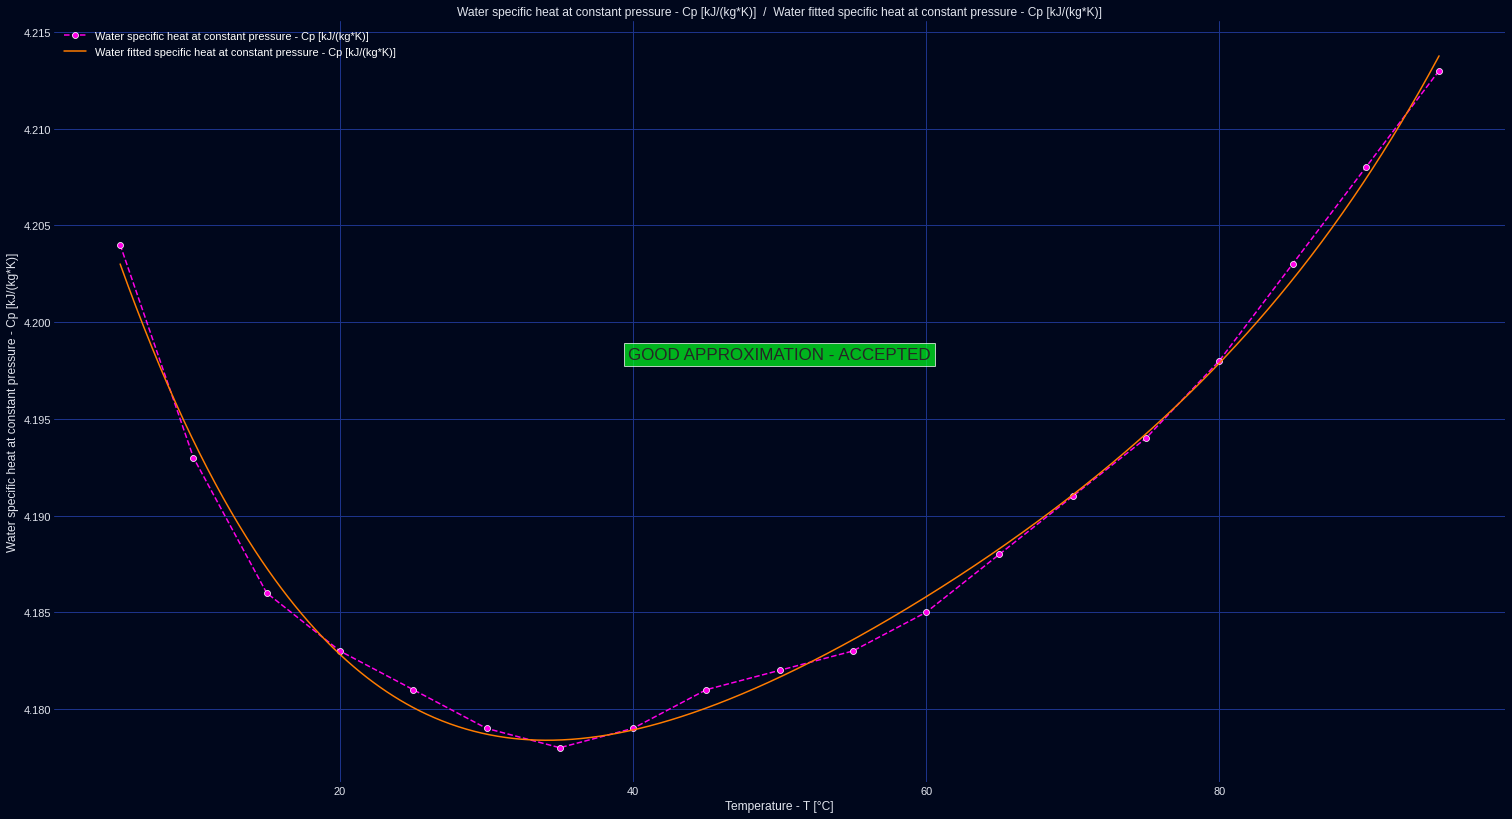

<Figure size 1872x1008 with 0 Axes>

In [41]:
water_cp = np.array(water[pa.cp_col])                                                                   # Water specific heat at constant pressure array (thermophysic variable vs temp)

# Poly-interpolation discarded, bad approximation
f_water_cp, x, y = pa.poly_approx(water_temp, water_cp, pa.Poly_approx_md.int, water_intp_typ)          # Water specific heat at constant pressure interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_cp, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_cp_lbl, pl.plt_intp_cp_lbl, pl.Poly_approx_res.disc, 2.45*1e-3)                  # Function call to plot water specific heat at constant pressure and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_water_cp, x, y = pa.poly_approx(water_temp, water_cp, pa.Poly_approx_md.fit, 4)                       # Water specific heat at constant pressure fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_cp, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_cp_lbl, pl.plt_fit_cp_lbl, pl.Poly_approx_res.acc, 2.45*1e-3)                    # Function call to plot water specific heat at constant pressure and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply water thermal conductivity interpolation/fitting

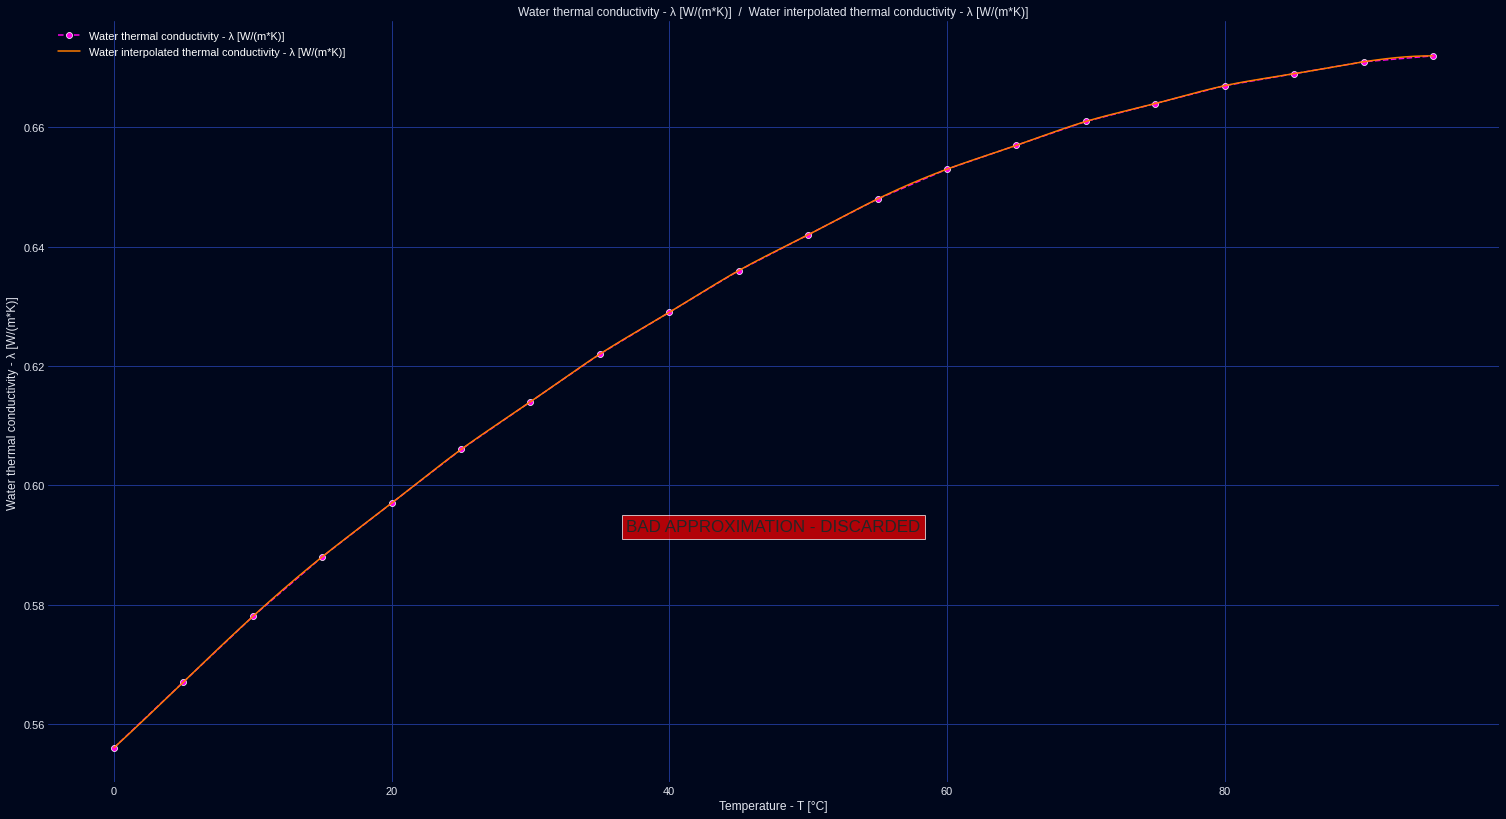

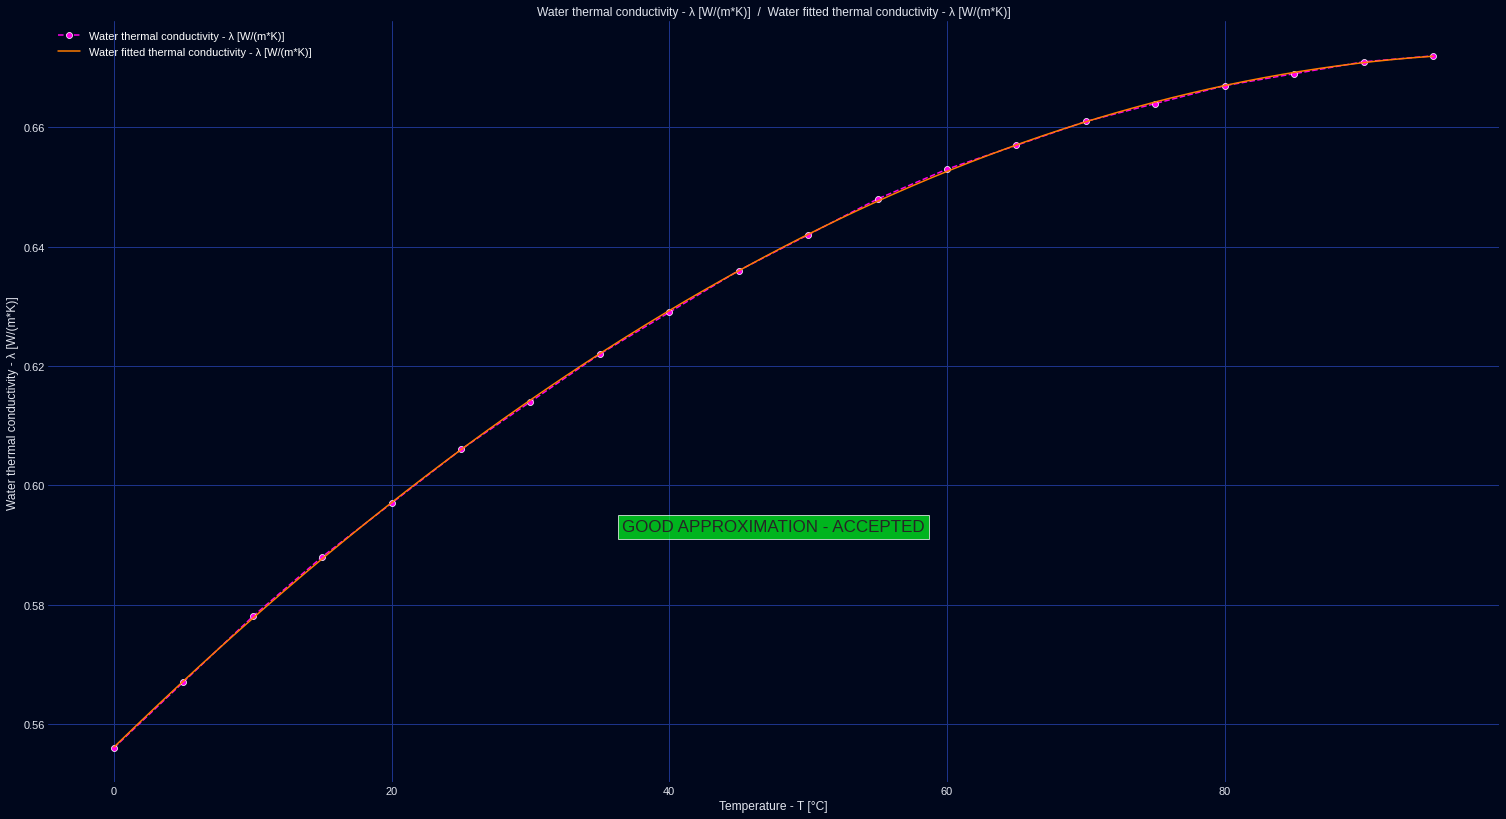

<Figure size 1872x1008 with 0 Axes>

In [42]:
water_lambda = np.array(water[pa.lambda_col])                                                           # Water thermal conductivity array (thermophysic variable vs temp)

# Poly-interpolation discarded, bad approximation
f_water_lambda, x, y = pa.poly_approx(water_temp, water_lambda, pa.Poly_approx_md.int, water_intp_typ)  # Water thermal conductivity interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_lambda, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_lambda_lbl, pl.plt_intp_lambda_lbl, pl.Poly_approx_res.disc, -2.1*1e-2)          # Function call to plot water thermal conductivity and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_water_lambda, x, y = pa.poly_approx(water_temp, water_lambda, pa.Poly_approx_md.fit, 4)               # Water thermal conductivity fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_lambda, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_lambda_lbl, pl.plt_fit_lambda_lbl, pl.Poly_approx_res.acc, -2.1*1e-2)            # Function call to plot water thermal conductivity and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply water kinematic viscosity interpolation/fitting

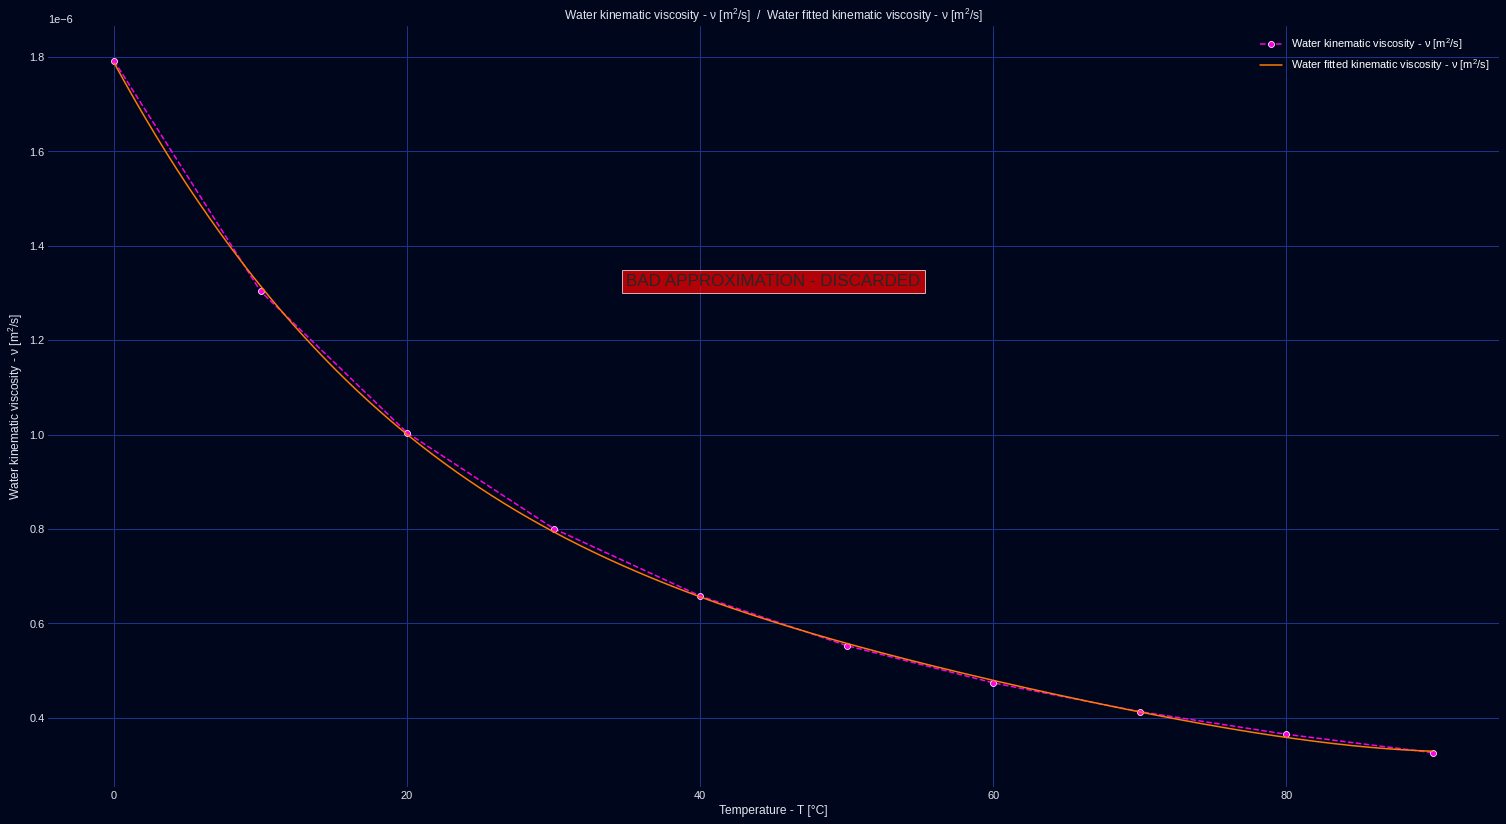

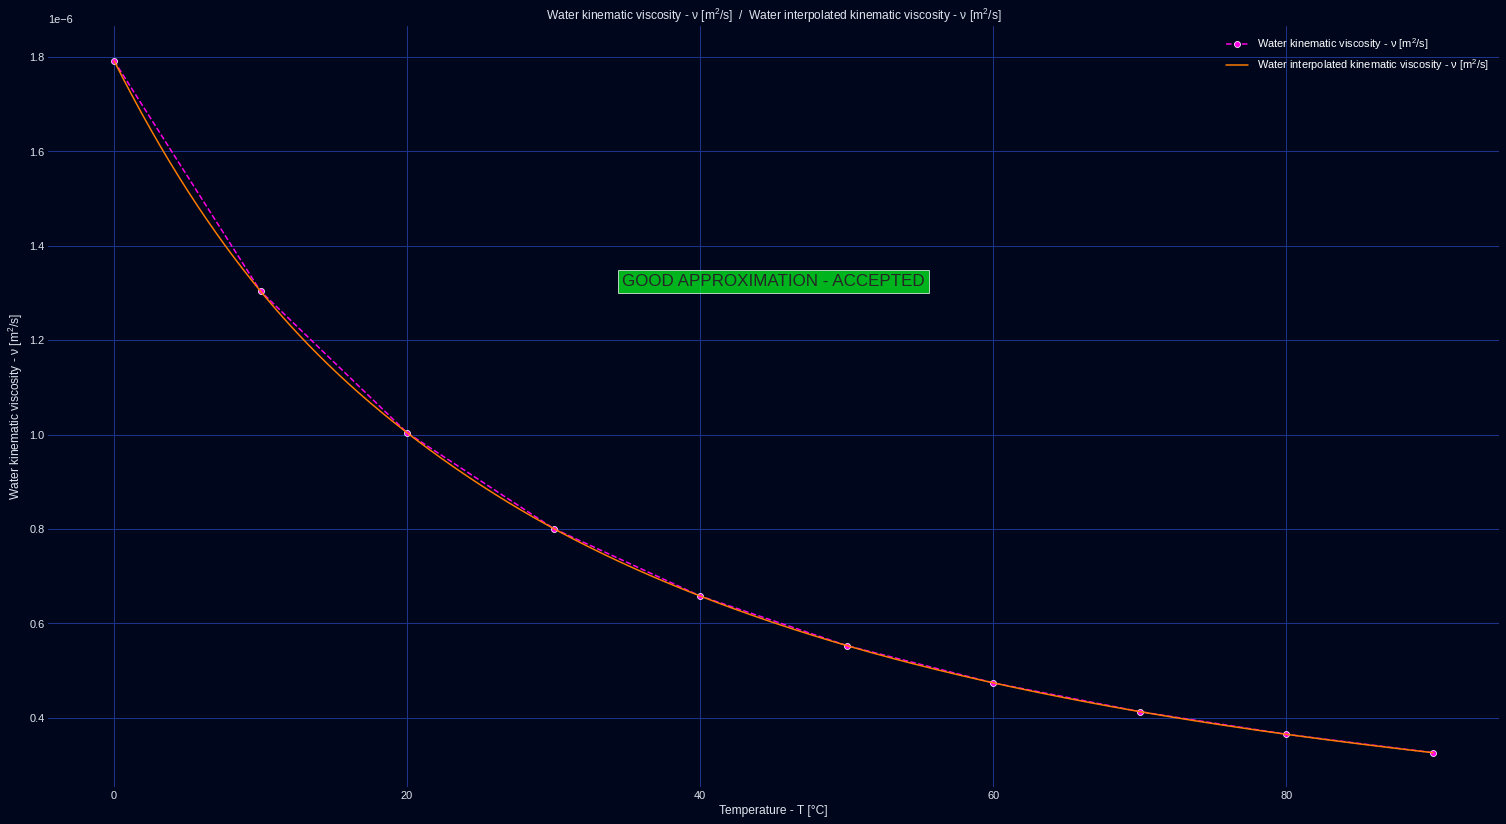

<Figure size 1872x1008 with 0 Axes>

In [43]:
water_ni = np.array(water[pa.ni_col])                                                                   # Water kinematic viscosity array (thermophysic variable vs temp)

# Poly-fitting discarded, bad approximation
f_water_ni, x, y = pa.poly_approx(water_temp, water_ni, pa.Poly_approx_md.fit, 4)                       # Water kinematic viscosity fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_ni, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_ni_lbl, pl.plt_fit_ni_lbl, pl.Poly_approx_res.disc, 2.65*1e-7)                   # Function call to plot water kinematic viscosity and curve-fitting (thermophysic variable at atm pressure vs temp)

# Poly-interpolation accepted, good approximation
f_water_ni, x, y = pa.poly_approx(water_temp, water_ni, pa.Poly_approx_md.int, water_intp_typ)          # Water kinematic viscosity interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_ni, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_ni_lbl, pl.plt_intp_ni_lbl, pl.Poly_approx_res.acc, 2.65*1e-7)                   # Function call to plot water kinematic viscosity and interpolation (thermophysic variable at atm pressure vs temp)

* Function definition to apply water thermodynamic beta (Coldness) interpolation/fitting

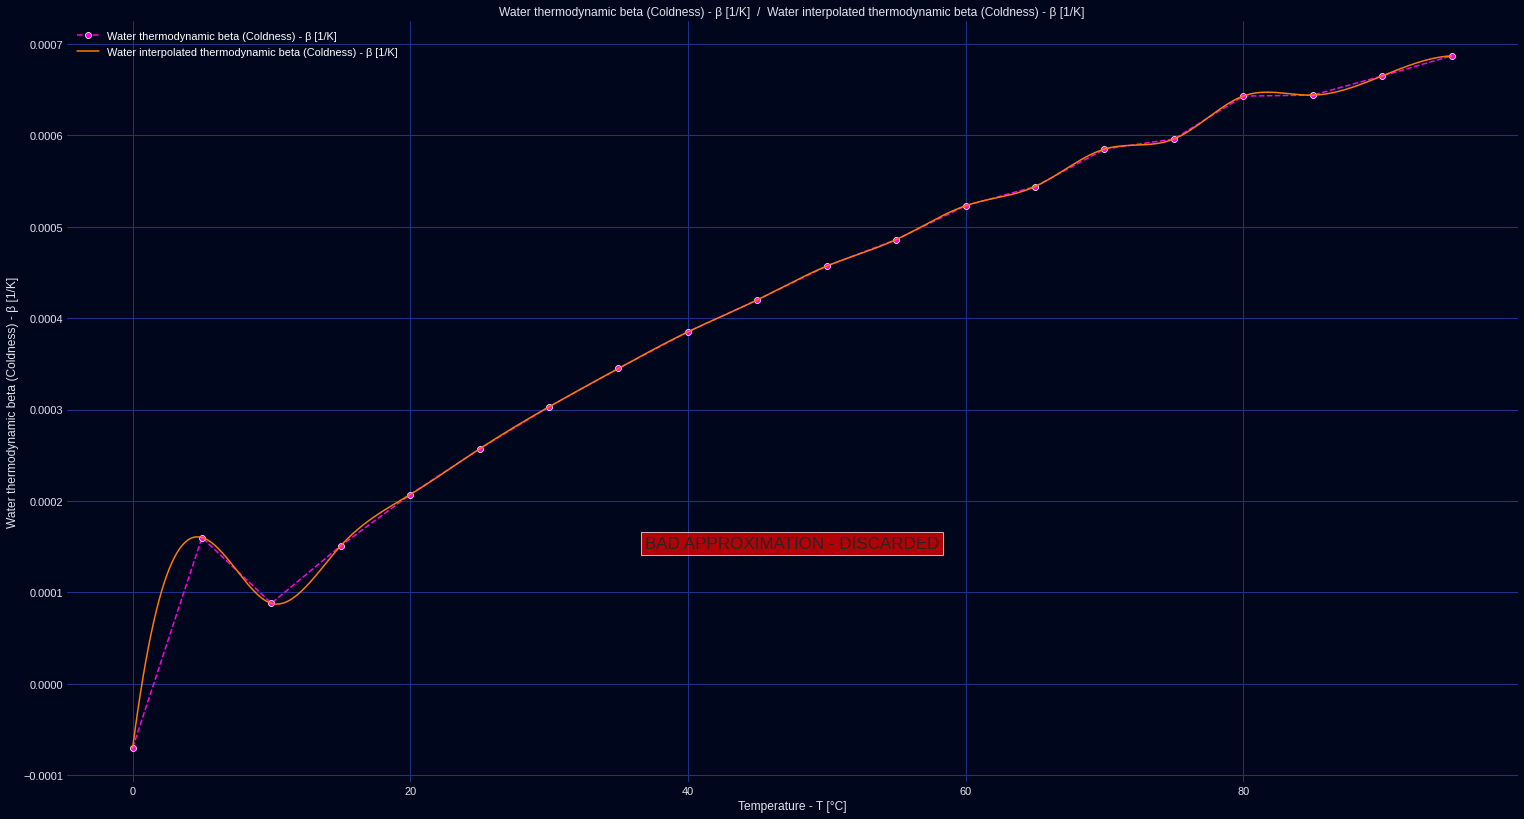

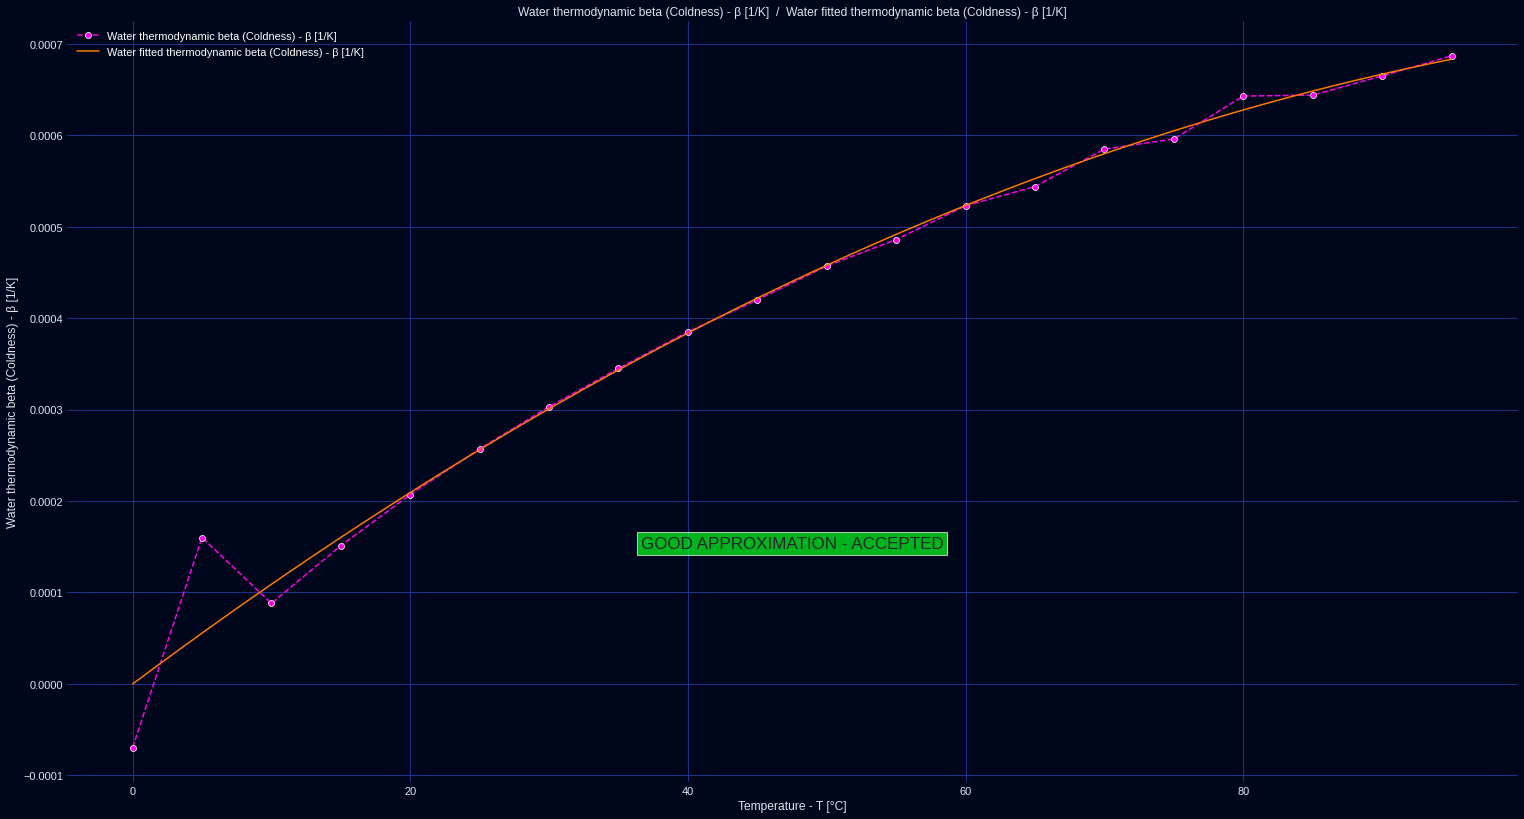

<Figure size 1872x1008 with 0 Axes>

In [44]:
water_beta = np.array(water[pa.beta_col])                                                               # Water thermodynamic beta (Coldness) array (thermophysic variable vs temp)

# Poly-interpolation discarded, bad approximation
f_water_beta, x, y = pa.poly_approx(water_temp, water_beta, pa.Poly_approx_md.int, water_intp_typ)      # Water thermodynamic beta (Coldness) interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_beta, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_beta_lbl, pl.plt_intp_beta_lbl, pl.Poly_approx_res.disc, -1.55*1e-4)             # Function call to plot water thermodynamic beta (Coldness) and interpolation (thermophysic variable at atm pressure vs temp)

# Poly-fitting accepted, good approximation
f_water_beta, x, y = pa.poly_approx(water_temp, water_beta, pa.Poly_approx_md.fit, 2)                   # Water thermodynamic beta (Coldness) fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_beta, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_beta_lbl, pl.plt_fit_beta_lbl, pl.Poly_approx_res.acc, -1.55*1e-4)               # Function call to plot water thermodynamic beta (Coldness) and curve-fitting (thermophysic variable at atm pressure vs temp)

* Function definition to apply water Prandtl number interpolation/fitting

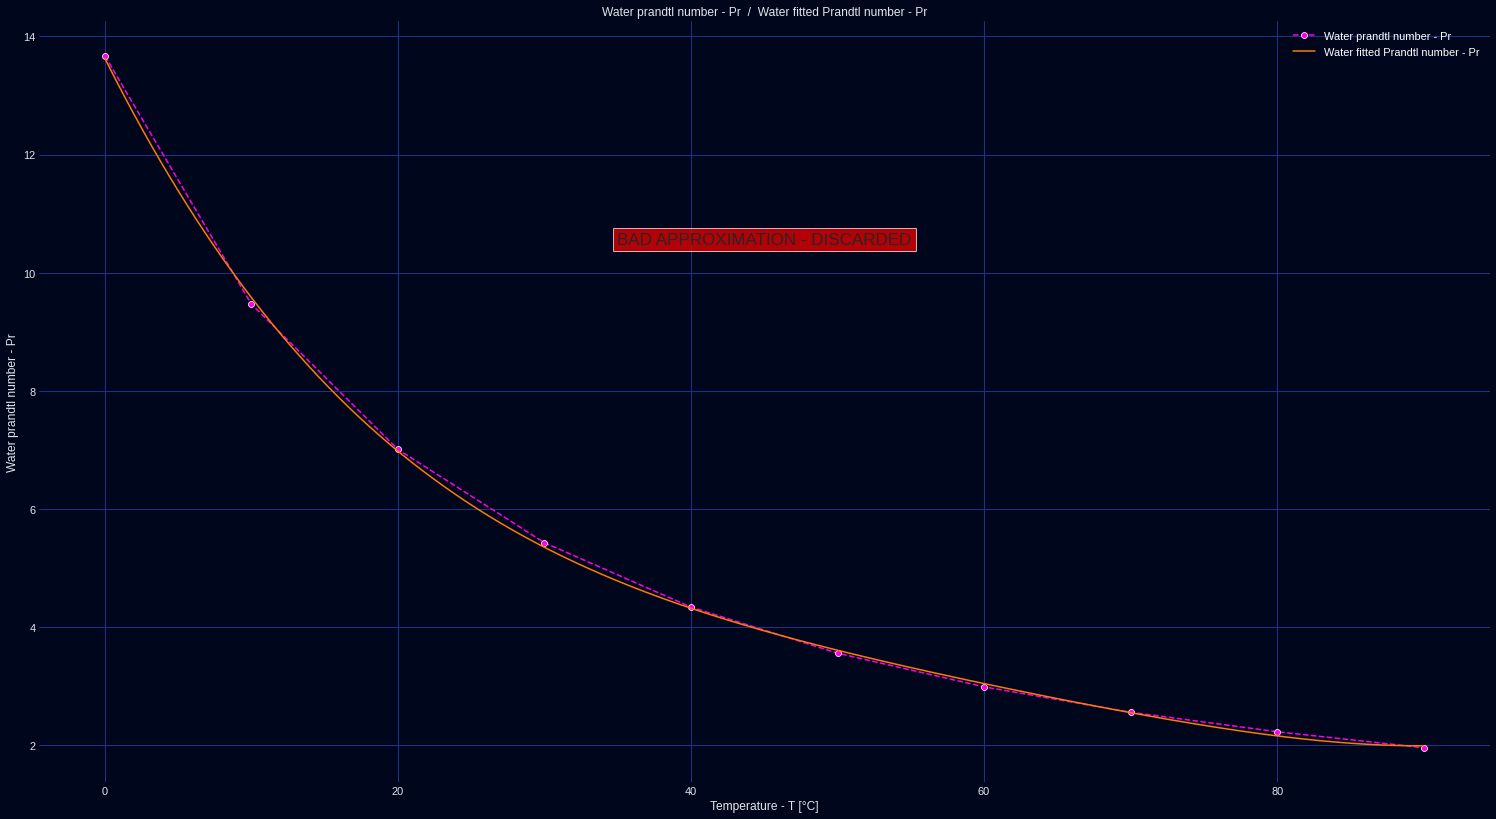

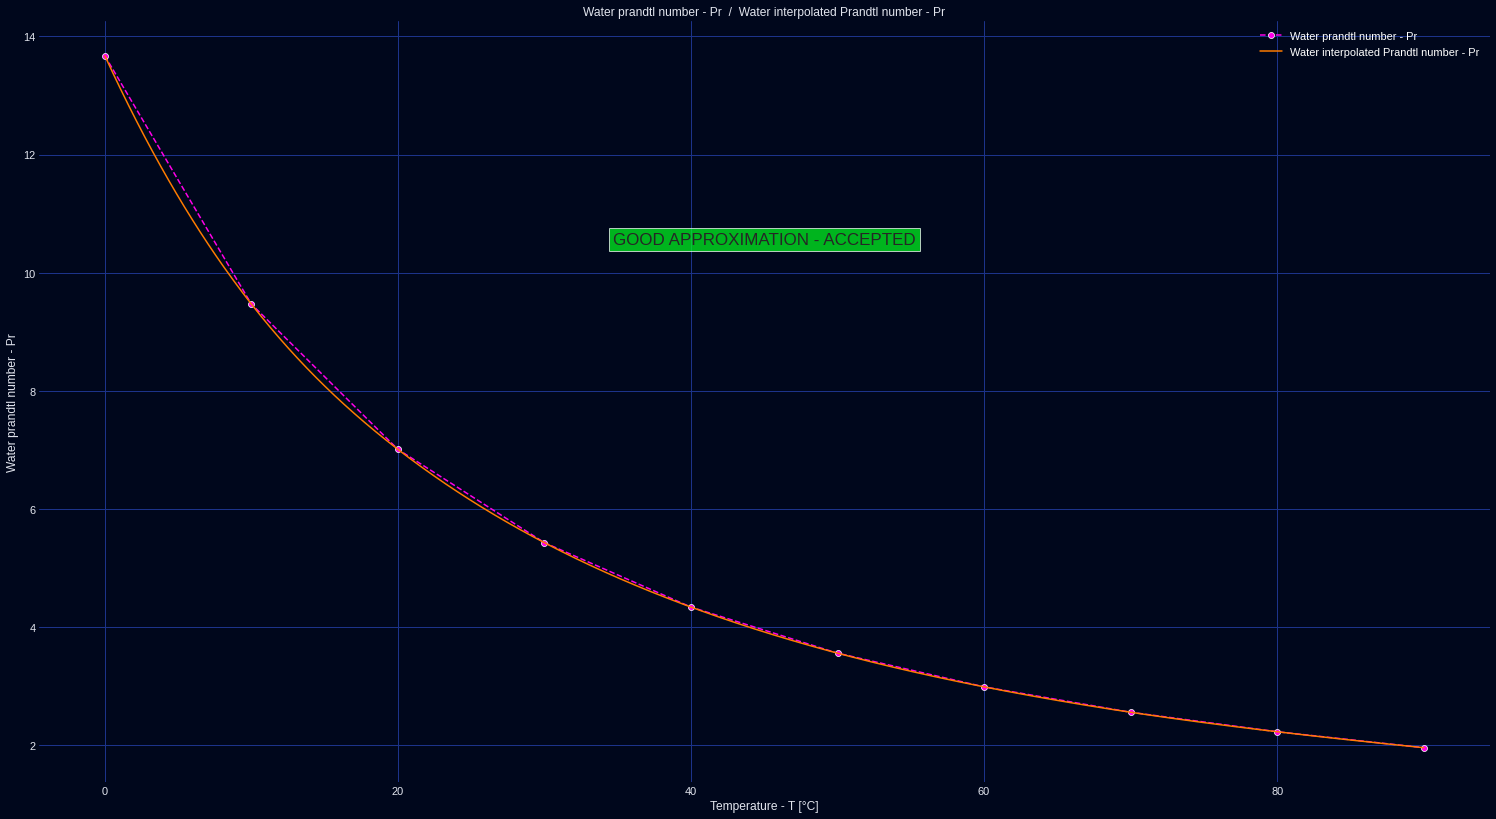

<Figure size 1872x1008 with 0 Axes>

In [45]:
water_pr = np.array(water[pa.pr_col])                                                                   # Water Prandtl number array (thermophysic variable vs temp)

# Poly-fitting discarded, bad approximation
f_water_pr, x, y = pa.poly_approx(water_temp, water_pr, pa.Poly_approx_md.fit, 4)                       # Water Prandtl number fitting function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_pr, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_pr_lbl, pl.plt_fit_pr_lbl, pl.Poly_approx_res.disc, 2.75)                        # Function call to plot water Prandtl number and curve-fitting (thermophysic variable at atm pressure vs temp)

# Poly-interpolation accepted, good approximation
f_water_pr, x, y = pa.poly_approx(water_temp, water_pr, pa.Poly_approx_md.int, water_intp_typ)          # Water Prandtl number interpolation function (thermophysic variable at atm pressure vs temp)
pl.plot_tp_vars(x, y, f_water_pr, water_intp_fit_pts, pl.Fluid_type.water, pl.plt_temp_lbl,
                pl.plt_pr_lbl, pl.plt_intp_pr_lbl, pl.Poly_approx_res.acc, 2.75)                        # Function call to plot water Prandtl number and interpolation (thermophysic variable at atm pressure vs temp)

## Engineering calcs

### - Heat-exchanger properties

* Heat-exchanger geometrical properties initialization

In [46]:
he =  ec.He()                                                                                           # New heat-exchanger obj declaration and following definition
he.eff_len_m = 0.680                                                                                    # Heat-exchamher effective length [m] init
he.glass_pipe_id_m = 0.05                                                                               # Heat-exchamher glass pipe internal-diameter [m] init
he.steel_pipes_id_m = 0.008                                                                             # Heat-exchamher steel pipes internal-diameter [m] init
he.steel_pipes_ed_m = 0.01                                                                              # Heat-exchamher steel pipes external-diameter [m] init
he.steel_pipes_num = 5                                                                                  # Number of heat-exchamher steel pipes init

* Heat-exchanger calculated geometrical properties initialization

In [47]:
he.steel_pipes_thick_m = he.steel_pipes_ed_m-he.steel_pipes_id_m                                        # Heat-exchamher steel pipes thickness [m] init
he.steel_pipes_is_m2 = ec.cyl_lat_surf(he.steel_pipes_num, he.steel_pipes_id_m, he.eff_len_m)           # Heat-exchamher steel pipes internal-surface [m^2] init
he.steel_pipes_es_m2 = ec.cyl_lat_surf(he.steel_pipes_num, he.steel_pipes_ed_m, he.eff_len_m)           # Heat-exchamher steel pipes external-surface [m^2] init

### - Experimental data conversions and pre-calcs operations

* Volume flow rate [l/h] conversion into mass flow rate [kg/s] using fluid density value at inlet fluid temperature

In [48]:
for meas in measures:                                                                                   # Measures scrollin' cycle
  meas.f1 = ec.vol_flow_rate_to_mass_flow_rate(meas.f1, f_water_rho(meas.t1))                           # Measure cold fluid vol flow rate [l/h] conv into mass flow rate [kg/s]
  meas.f2 = ec.vol_flow_rate_to_mass_flow_rate(meas.f2, f_water_rho(meas.t2))                           # Measure hot fluid vol flow rate [l/h] conv into mass flow rate [kg/s]

* Average fluid-temperatures calculation

In [49]:
for meas in measures:                                                                                   # Measures scrollin' cycle
  meas.avg_cold_fl_temp = ec.avg(meas.t1, meas.t3)                                                      # Measure avg cold fluid temp calc
  meas.avg_hot_fl_temp = ec.avg(meas.t2, meas.t4)                                                       # Measure avg hot fluid temp calc

* Cold and hot fluids delta temperatures calculations

In [50]:
for meas in measures:                                                                                   # Measures scrollin' cycle
  meas.cold_fl_delta_temp = meas.t3-meas.t1                                                             # Measure cold fluid delta-temp calc
  meas.hot_fl_delta_temp = meas.t4-meas.t2                                                              # Measure hot fluid delta-temp calc

* Log-mean temperature difference (LMTDs) calculations

In [51]:
for meas in measures:                                                                                   # Measures scrollin' cycle
  meas.lmtd = ec.lmtd(meas.t2-meas.t1, meas.t4-meas.t3)                                                 # Measure log-mean temperature difference (LMTD)

### - Thermal power exchange and loss

* Thermal power exchanged by fluids [kW] and thermal power loss [kW], calculated using Cp at average fluid temperature

In [52]:
therm_pows_dbg_flg = True                                                                               # Thermal powers debug flag (set to True in order to consult output)

idx = 0                                                                                                 # Measre index
for meas in measures:                                                                                   # Measures scrollin' cycle
  meas.cold_fl_tr_heat = ec.therm_pow(meas.f1, f_water_cp(meas.avg_cold_fl_temp),
                                      meas.cold_fl_delta_temp)                                          # Measure cold fluid transferred heat [kW]
  meas.hot_fl_tr_heat = ec.therm_pow(meas.f2, f_water_cp(meas.avg_hot_fl_temp),
                                     meas.hot_fl_delta_temp)                                            # Measure hot fluid transferred heat [kW]
  meas.heat_loss = meas.hot_fl_tr_heat+meas.cold_fl_tr_heat                                             # Measure heat losses [kW]
  if (therm_pows_dbg_flg):                                                                              # If dbg flg is ena
    print("\n--> "+da.meas_names[idx]+" thermal power exchange and loss:")                              # Print dbg fbk
    print("Cold fluid acquired heat: "+str(meas.cold_fl_tr_heat)+" kW")                                 # Print dbg fbk
    print("Hot fluid transferred heat: "+str(meas.hot_fl_tr_heat)+" kW")                                # Print dbg fbk
    print("Heat losses: "+str(meas.heat_loss)+" kW")                                                    # Print dbg fbk
    idx += 1                                                                                            # Measure index upd


--> Cocurrent measure 1 thermal power exchange and loss:
Cold fluid acquired heat: 5.700996970190151 kW
Hot fluid transferred heat: -6.023372300191799 kW
Heat losses: -0.3223753300016474 kW

--> Countercurrent measure 1 thermal power exchange and loss:
Cold fluid acquired heat: 5.8408079497386165 kW
Hot fluid transferred heat: -6.407806384147749 kW
Heat losses: -0.5669984344091326 kW

--> Countercurrent measure 2 thermal power exchange and loss:
Cold fluid acquired heat: 3.590001337624525 kW
Hot fluid transferred heat: -4.139565406275072 kW
Heat losses: -0.5495640686505476 kW

--> Cocurrent measure 2 thermal power exchange and loss:
Cold fluid acquired heat: 3.4343948410650307 kW
Hot fluid transferred heat: -3.9639220342493915 kW
Heat losses: -0.5295271931843608 kW


### - Global heat transfer coefficients (global HTCs)

* External global heat transfer coefficients (external global HTCs) calculation during the 4 measures -

In [53]:
g_htcs_dbg_flg = True                                                                                   # Global heat transfer coefficients debug flag (set to True in order to consult output)

idx = 0                                                                                                 # Measre index
for meas in measures:                                                                                   # Measures scrollin' cycle
  meas.glob_htc = ec.glob_htc_coeff(meas.hot_fl_tr_heat, he.steel_pipes_es_m2, meas.lmtd)               # Measure global heat transfer coefficient (global HTC) [kW/(m^2*K)]
  if (g_htcs_dbg_flg):                                                                                  # If dbg flg is ena
    print("--> "+da.meas_names[idx]+" global heat transfer: "+str(meas.glob_htc)+" kW")                 # Print dbg fbk
    idx += 1                                                                                            # Measure index upd

--> Cocurrent measure 1 global heat transfer: -2.1962233736173937 kW
--> Countercurrent measure 1 global heat transfer: -2.3733352564090313 kW
--> Countercurrent measure 2 global heat transfer: -1.8064014878653825 kW
--> Cocurrent measure 2 global heat transfer: -1.6827187770355927 kW
